# Time series analysis model

### The script below contians the following:
### 1. Import libraries and data
### 2. Data preparation for analysis
### 3. Arima Model
### 4. Forecasting using Arima, Auto Arima and Regression model
### 5. Exporting the data

## 1. Import libraries and data

In [1]:
# Import libraries

import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
# Creating the path variable

path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [3]:
# Importing state dataframe

st = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'states.csv'), index_col = False)

In [4]:
# Importing district dataframe

dist = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'districts.csv'), index_col = False)

In [5]:
st.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


## 2. Data Preparation for analysis

In [6]:
st.rename(columns = {'STATE':'state','ENROLL':'enroll', 'YEAR':'year', 'TOTAL_REVENUE':'total_rev', 'FEDERAL_REVENUE':'fed_rev','STATE_REVENUE':'st_rev','LOCAL_REVENUE':'loc_rev', 'TOTAL_EXPENDITURE':'total_exp', 'INSTRUCTION_EXPENDITURE':'instruction_exp', 'SUPPORT_SERVICES_EXPENDITURE':'service_exp', 'OTHER_EXPENDITURE':'other_exp','CAPITAL_OUTLAY_EXPENDITURE':'capital_exp'}, inplace = True)

In [7]:
st.head()

,state,year,enroll,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


In [8]:
st.isnull().sum()

state               0
year                0
enroll             51
total_rev           0
fed_rev             0
st_rev              0
loc_rev             0
total_exp           0
instruction_exp     0
service_exp         0
other_exp          51
capital_exp         0
dtype: int64

In [9]:
df_st = st[st['year'] > 1992]

In [10]:
df_st.isnull().sum()

state              0
year               0
enroll             0
total_rev          0
fed_rev            0
st_rev             0
loc_rev            0
total_exp          0
instruction_exp    0
service_exp        0
other_exp          0
capital_exp        0
dtype: int64

In [11]:
dist.rename(columns = {'STATE':'state','ENROLL':'enroll','NAME' : 'school_dist_name', 'YRDATA':'year', 'TOTALREV':'total_rev', 'TFEDREV':'fed_rev','TSTREV':'st_rev','TLOCREV':'loc_rev', 'TOTALEXP':'total_exp', 'TCURINST':'instruction_exp', 'TCURSSVC':'service_exp', 'TCURONON':'other_exp','TCAPOUT':'capital_exp'}, inplace = True)

In [12]:
dist.head()

,state,enroll,school_dist_name,year,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
0,Alabama,9609.0,AUTAUGA COUNTY SCHOOL DISTRICT,2016,80867,7447,53842,19578,76672,43843,23941,6401.0,1506
1,Alabama,30931.0,BALDWIN COUNTY SCHOOL DISTRICT,2016,338236,23710,145180,169346,299880,164977,97231,19439.0,9749
2,Alabama,912.0,BARBOUR COUNTY SCHOOL DISTRICT,2016,10116,2342,5434,2340,10070,4907,3896,975.0,110
3,Alabama,2842.0,EUFAULA CITY SCHOOL DISTRICT,2016,26182,3558,15900,6724,29843,15302,7901,2274.0,4133
4,Alabama,3322.0,BIBB COUNTY SCHOOL DISTRICT,2016,32486,3664,21846,6976,31662,16407,11087,3122.0,486


In [13]:
dist.isnull().sum()

state                   0
enroll              15868
school_dist_name        0
year                    0
total_rev               0
fed_rev                 0
st_rev                  0
loc_rev                 0
total_exp               0
instruction_exp         0
service_exp             0
other_exp           15868
capital_exp             0
dtype: int64

In [14]:
df_dist = dist[dist['year'] > 1992]

In [15]:
df_dist.isnull().sum()

state               0
enroll              0
school_dist_name    0
year                0
total_rev           0
fed_rev             0
st_rev              0
loc_rev             0
total_exp           0
instruction_exp     0
service_exp         0
other_exp           0
capital_exp         0
dtype: int64

In [16]:
st_time = df_st[['state', 'year','total_rev']]

In [17]:
st_time.head()

,state,year,total_rev
51,Alabama,1993,2827391
52,Alaska,1993,1191398
53,Arizona,1993,3427976
54,Arkansas,1993,1346909
55,California,1993,28043338


In [18]:
# Changing the time to date 
st_time['year'] = st_time['year'].astype(str) + '-01-01'
st_time['year'] = pd.to_datetime(st_time['year'])

st_time.head()

,state,year,total_rev
51,Alabama,1993-01-01,2827391
52,Alaska,1993-01-01,1191398
53,Arizona,1993-01-01,3427976
54,Arkansas,1993-01-01,1346909
55,California,1993-01-01,28043338


In [19]:
# Splitting the data

st_train = st_time[st_time['year'] < '2012-01-01']
st_valid = st_time[st_time['year'] >= '2011-01-01']

print('st_train Shape', st_train.shape)
print('st_Valid Shape', st_valid.shape)

st_train['year'].unique()

st_train Shape (969, 3)
st_Valid Shape (306, 3)


array(['1993-01-01T00:00:00.000000000', '1994-01-01T00:00:00.000000000',
       '1995-01-01T00:00:00.000000000', '1996-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1998-01-01T00:00:00.000000000',
       '1999-01-01T00:00:00.000000000', '2000-01-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '2005-01-01T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

### Filtering the data to one state to check the ARIMA model

In [20]:
# filtering the train data
al = st_train[st_train['state'] == 'Alabama']
al2 = al[['year', 'total_rev']]

#filtering the valid data
al_v = st_valid[st_valid['state'] == 'Alabama']
al_v2 = al_v[['year', 'total_rev']]

# set the date into index
al2.set_index('year', inplace=True)
al_v2.set_index('year', inplace=True)

# Setting the Index for 6 years
index_6_years = pd.date_range(al2.index[-1], freq='AS', periods = 6) 

index_6_years

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [21]:
len(st_train['state'].unique())

51

In [22]:
al

,state,year,total_rev
51,Alabama,1993-01-01,2827391
102,Alabama,1994-01-01,2970223
153,Alabama,1995-01-01,3367437
204,Alabama,1996-01-01,3365113
255,Alabama,1997-01-01,3981788
306,Alabama,1998-01-01,4140537
357,Alabama,1999-01-01,4471546
408,Alabama,2000-01-01,4885917
459,Alabama,2001-01-01,4832946
510,Alabama,2002-01-01,5128559


In [23]:
al2

,total_rev
year,
1993-01-01,2827391
1994-01-01,2970223
1995-01-01,3367437
1996-01-01,3365113
1997-01-01,3981788
1998-01-01,4140537
1999-01-01,4471546
2000-01-01,4885917
2001-01-01,4832946


In [24]:
al_v

,state,year,total_rev
969,Alabama,2011-01-01,7376725
1020,Alabama,2012-01-01,7136949
1071,Alabama,2013-01-01,7197439
1122,Alabama,2014-01-01,7357267
1173,Alabama,2015-01-01,7360222
1224,Alabama,2016-01-01,7498567


In [25]:
al_v2

,total_rev
year,
2011-01-01,7376725
2012-01-01,7136949
2013-01-01,7197439
2014-01-01,7357267
2015-01-01,7360222
2016-01-01,7498567


In [26]:
al_v2.shape

(6, 1)

## 3. ARIMA model

The MSE of ARIMA is: 133628.23121170714


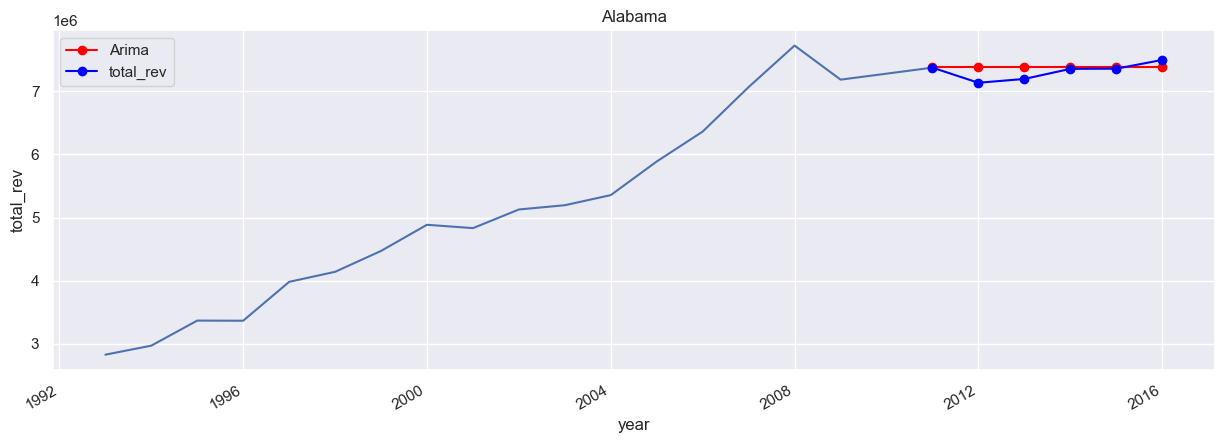

In [27]:
# Running ARIMA with random numbers
model_arima = ARIMA(al2, order=(0,1,3)) 
model_arima_fit = model_arima.fit()

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(6)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_6_years)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='year', y='total_rev', data = al)
chart.set_title('Alabama')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
al_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(al_v['total_rev'].values, fcast1.values, squared=False))

## 4. Forecasting using ARIMA, Auto ARIMA and Regression model

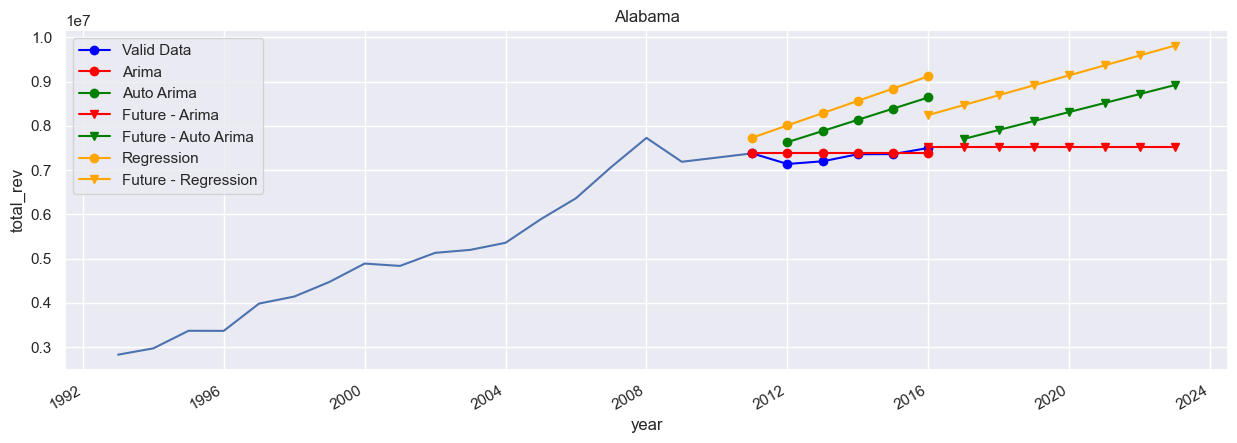

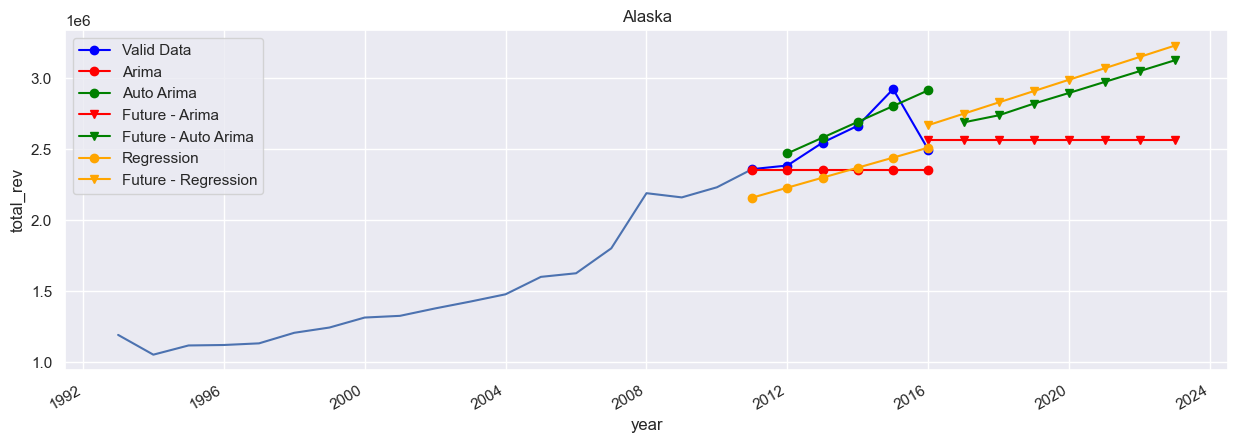

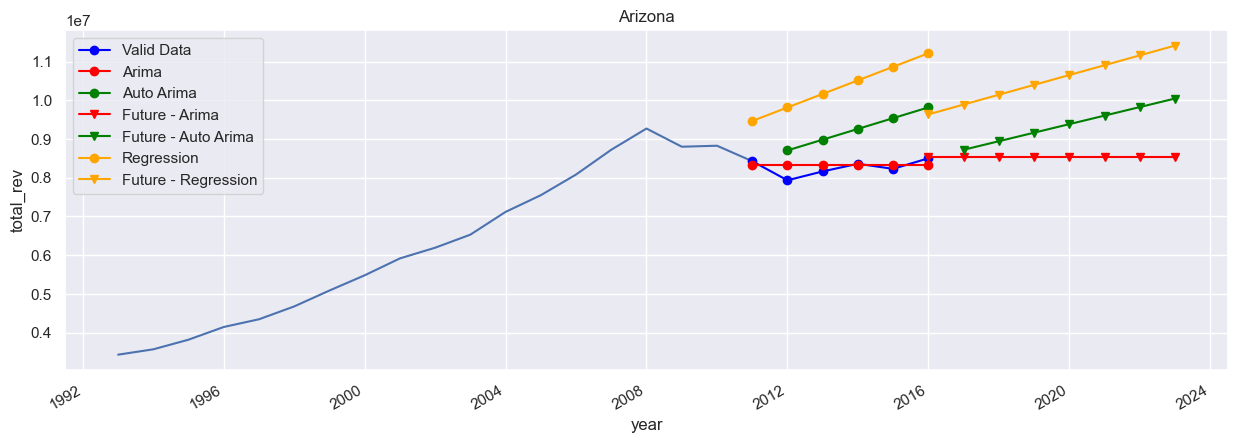

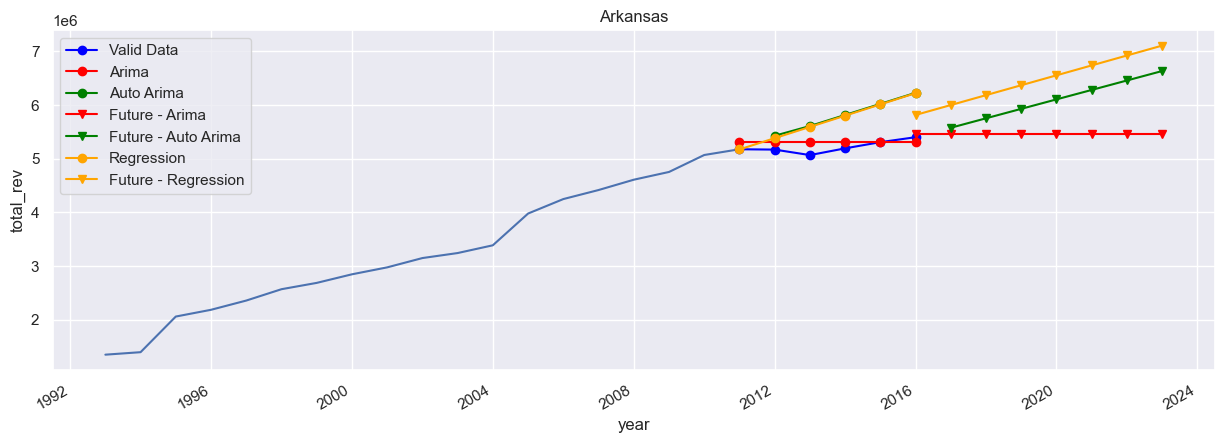

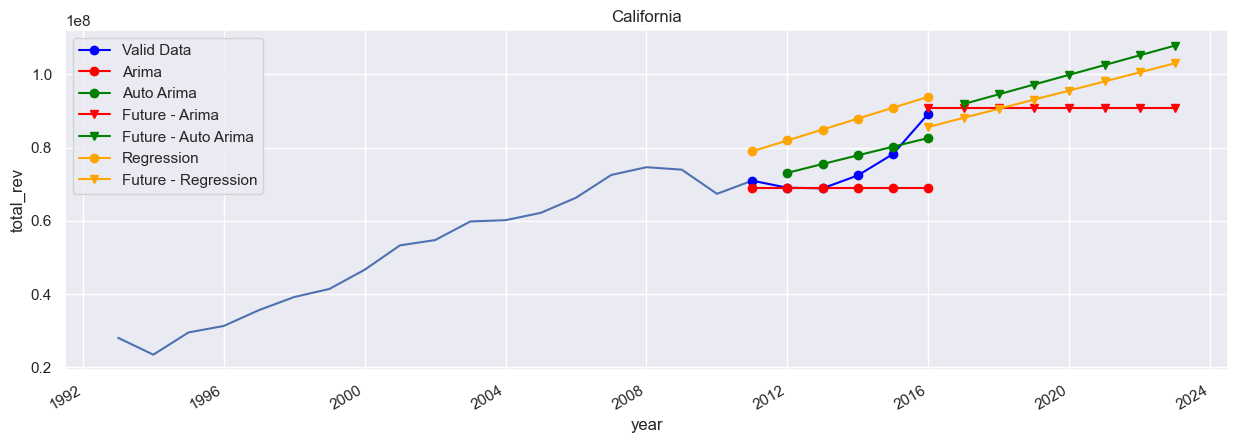

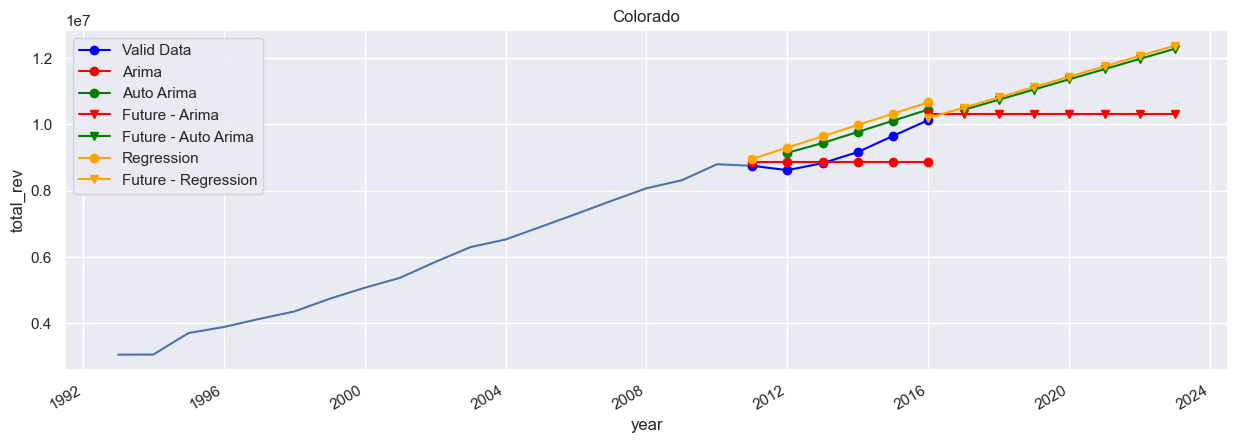

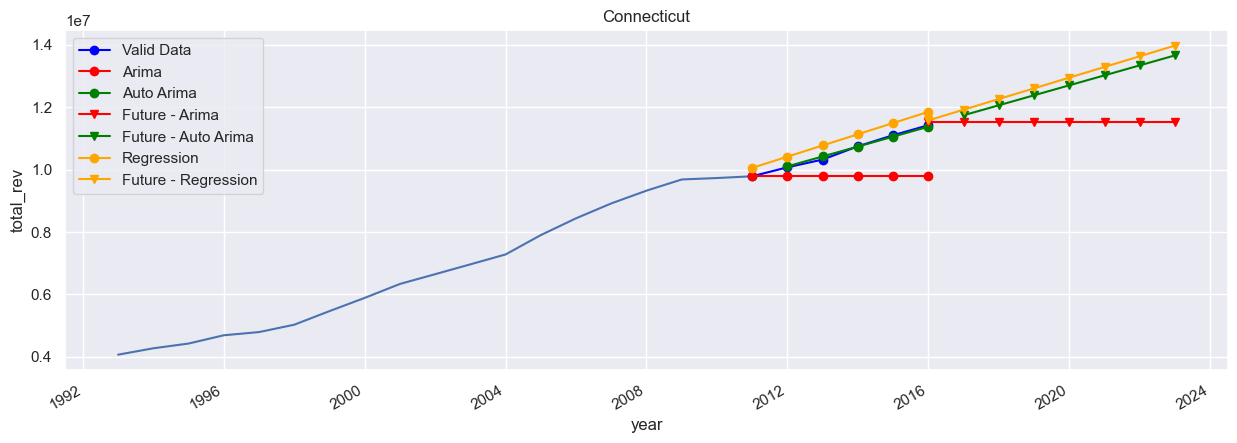

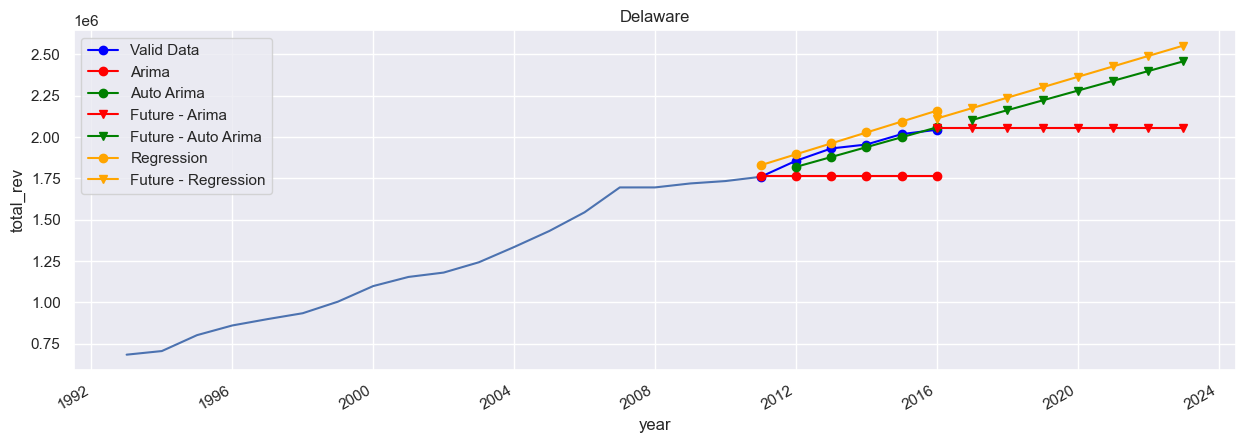

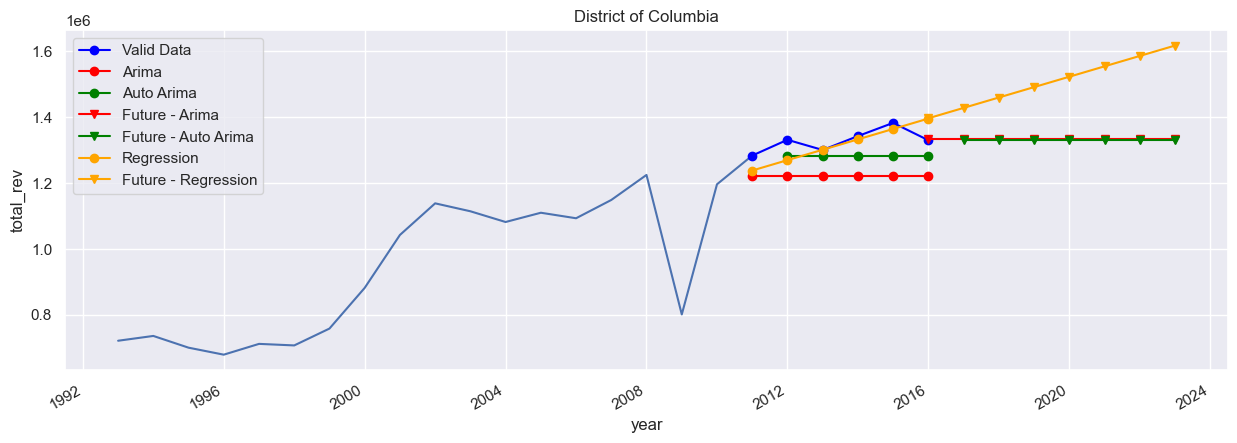

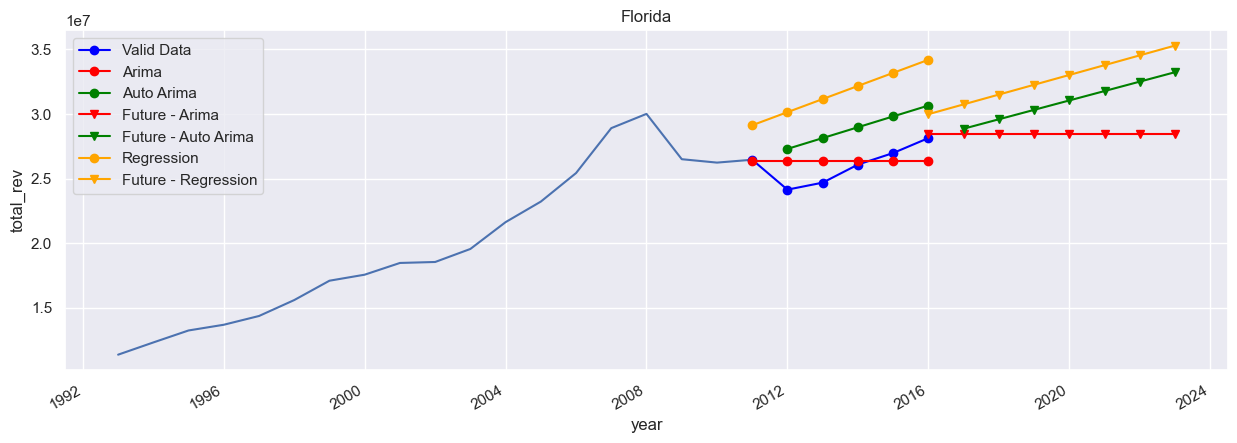

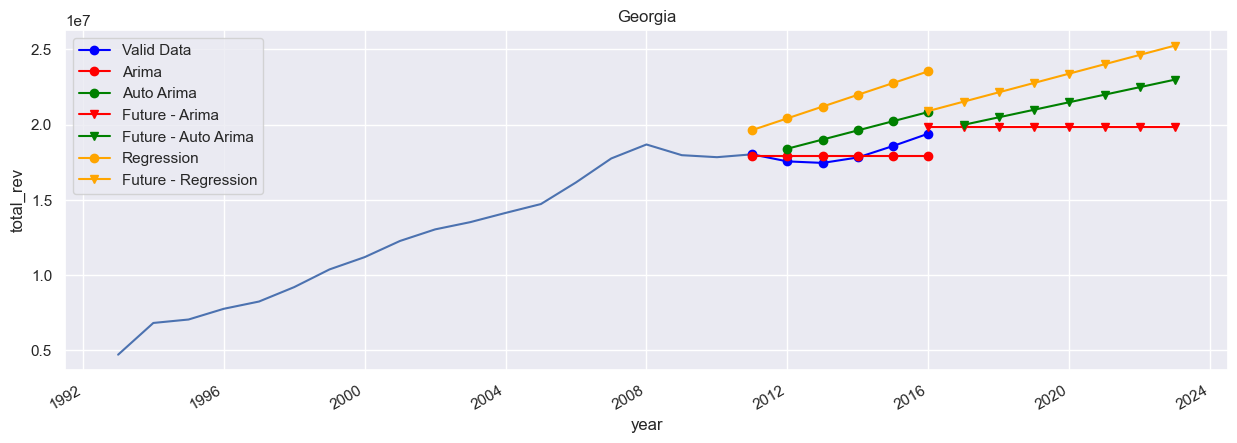

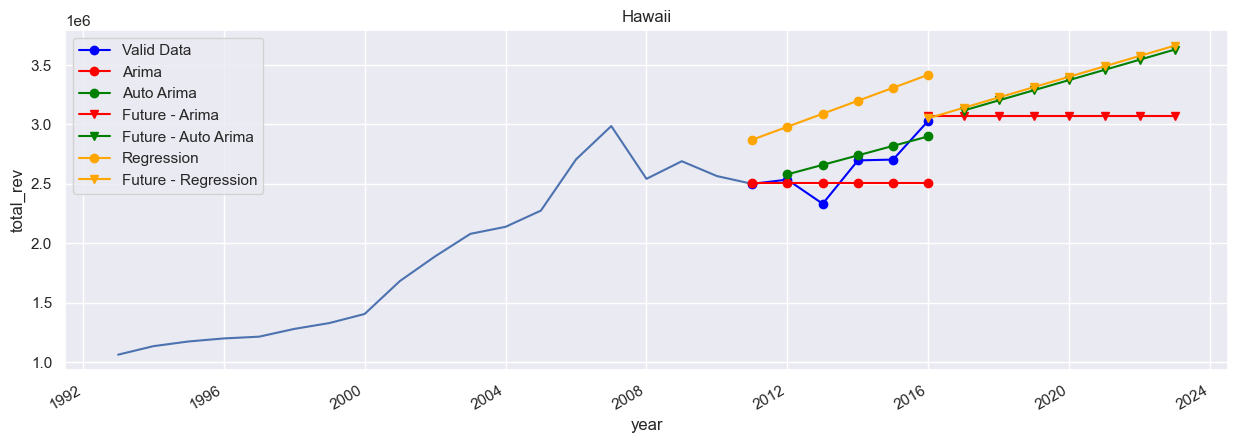

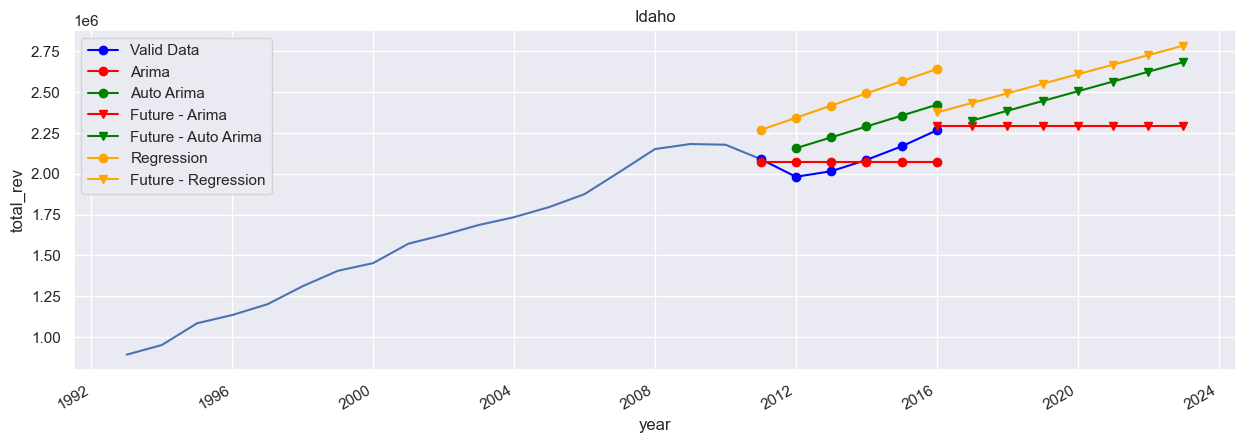

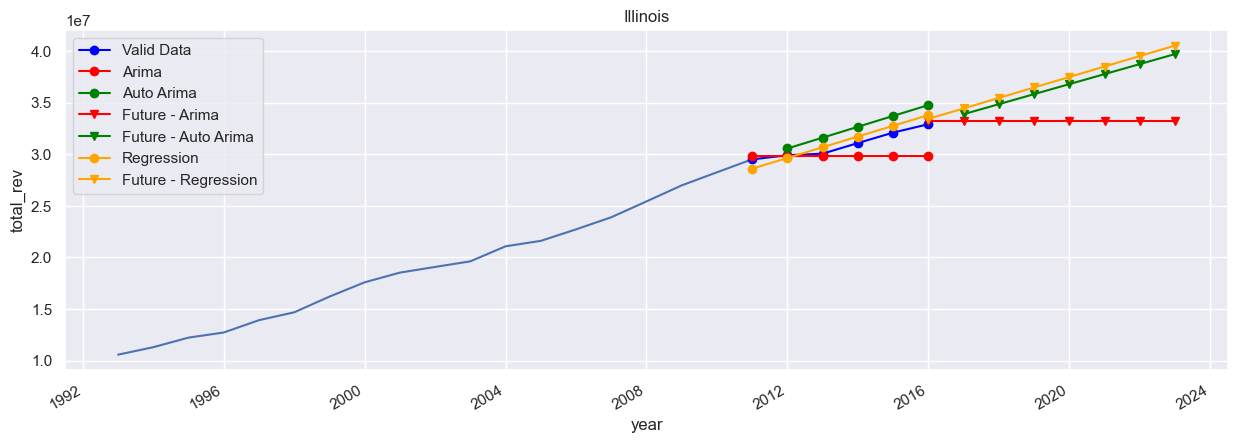

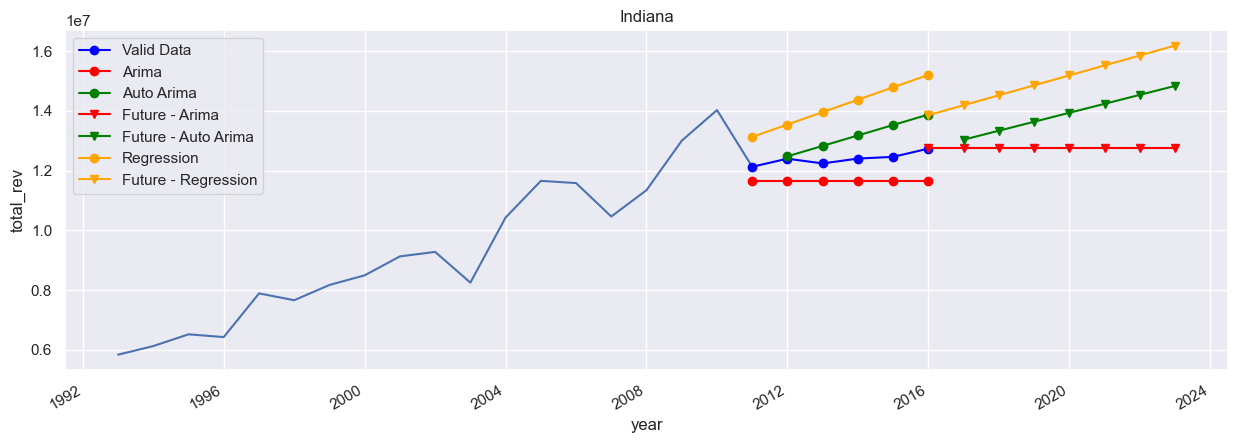

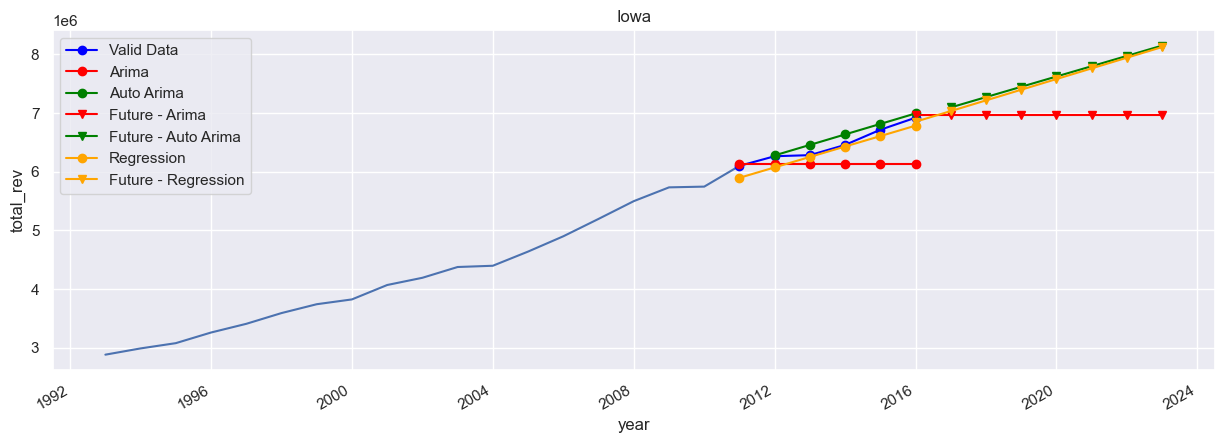

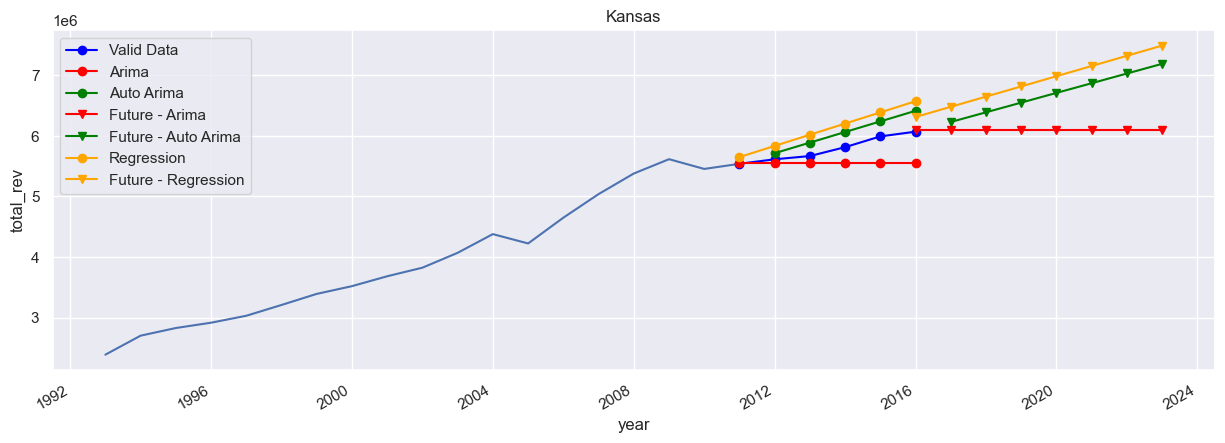

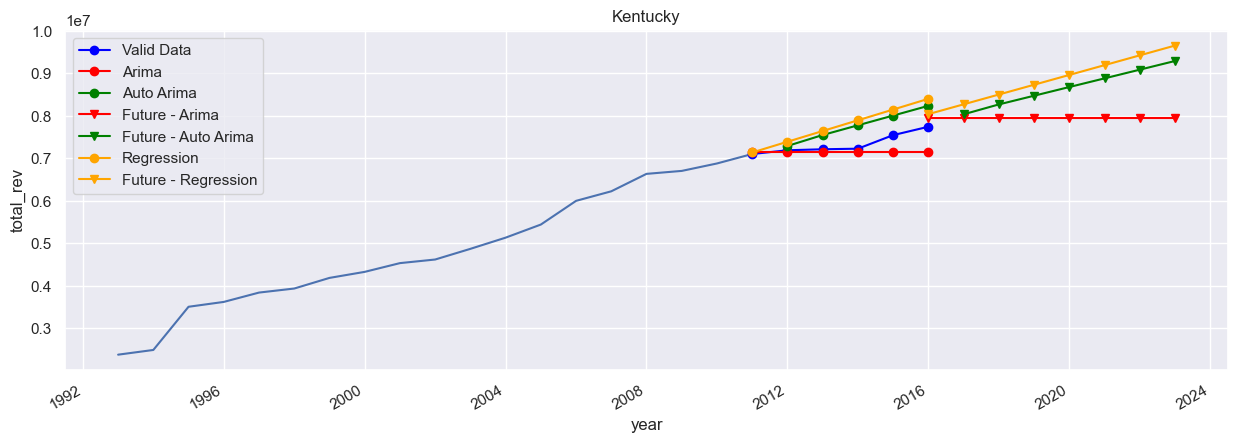

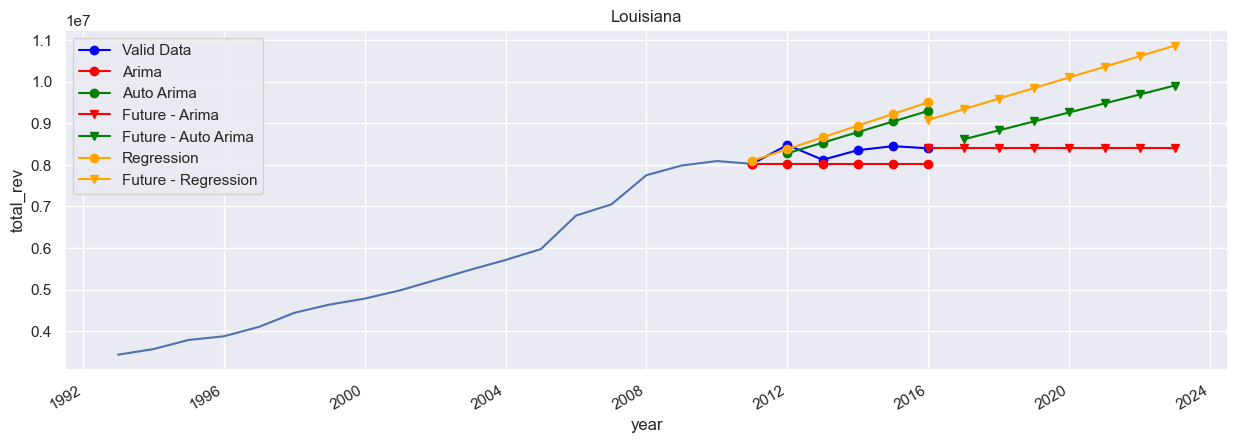

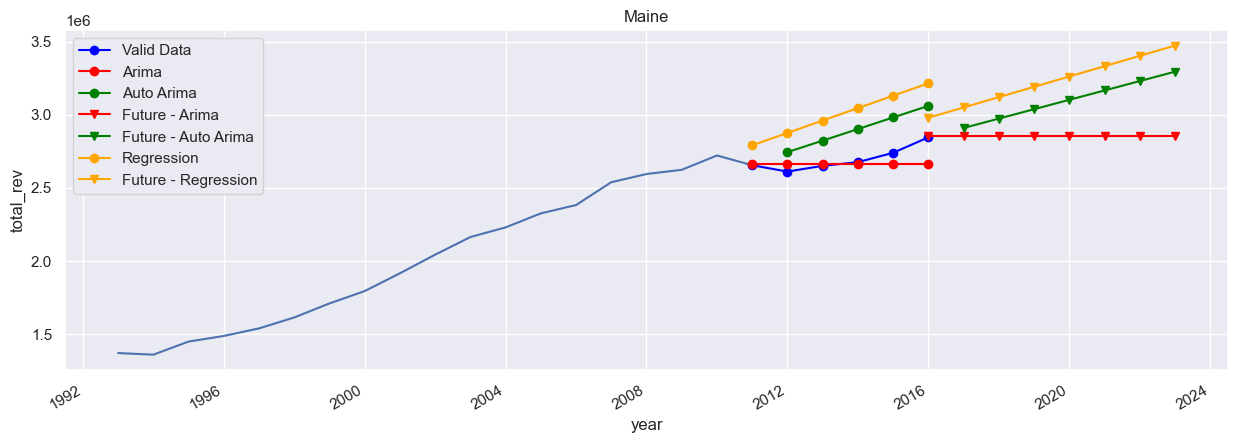

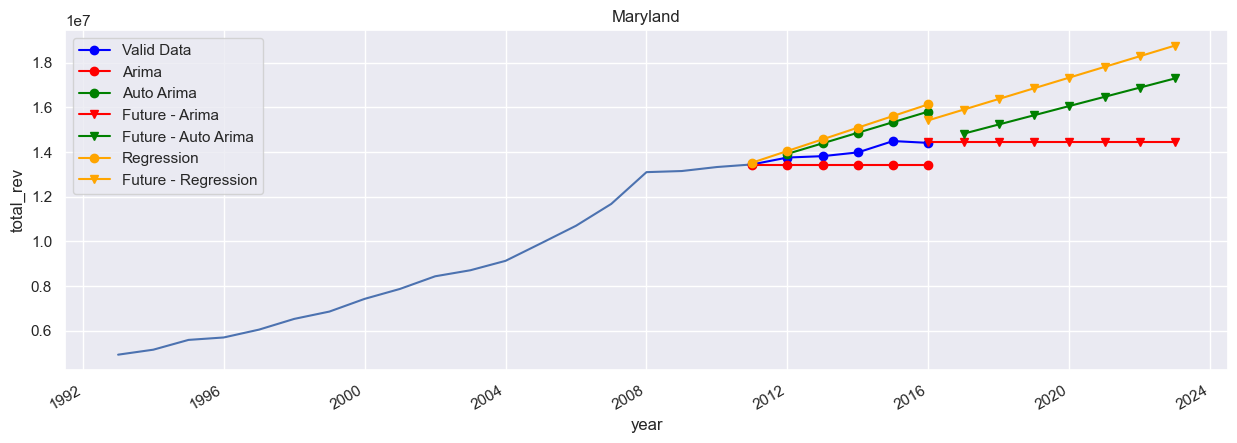

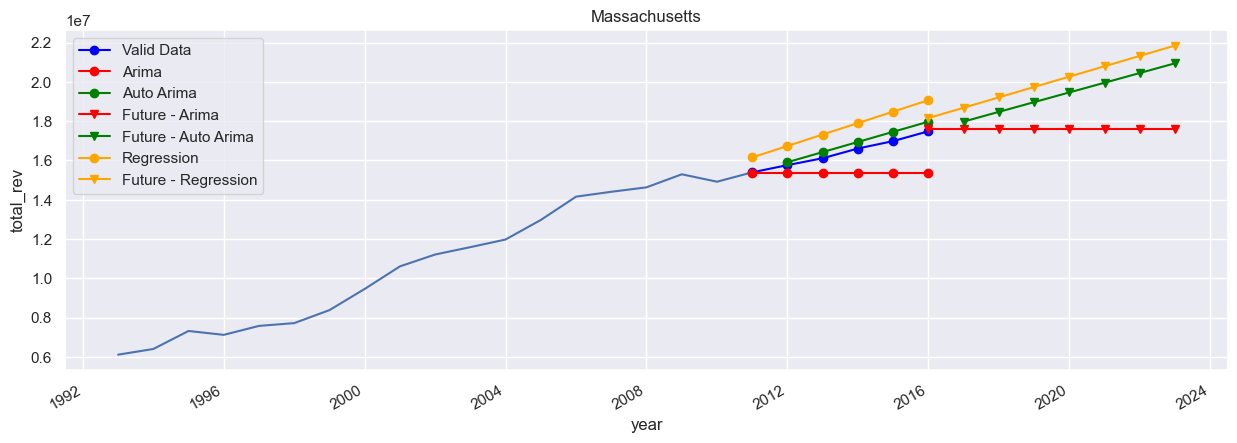

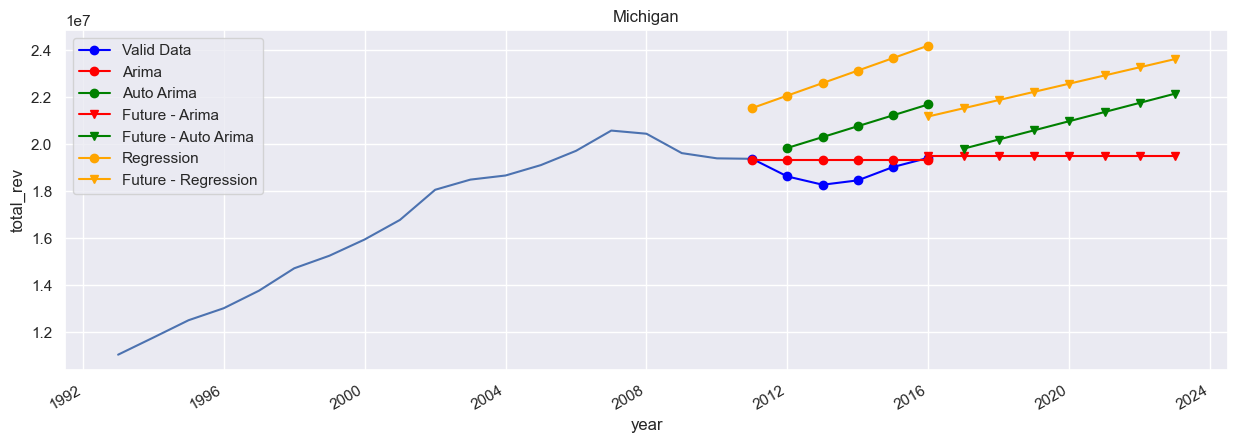

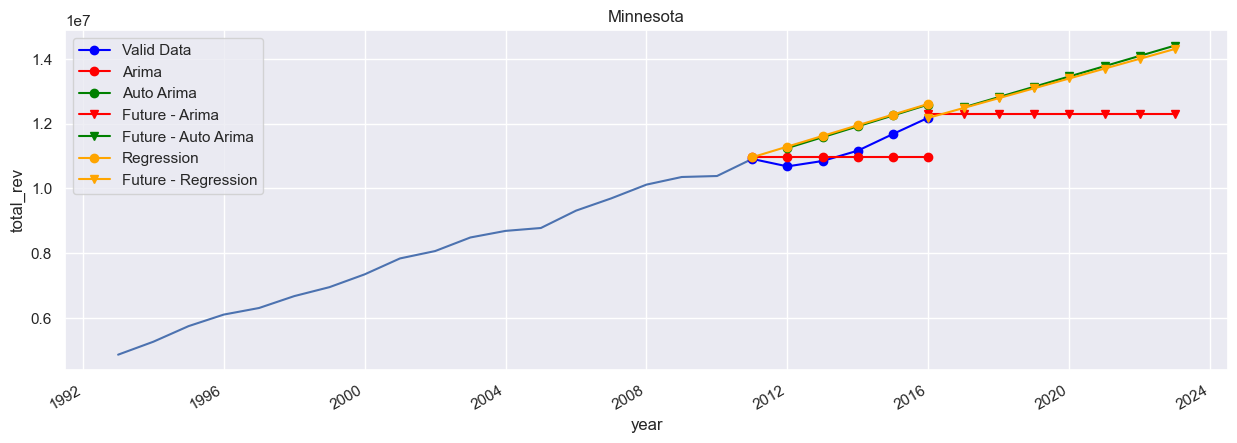

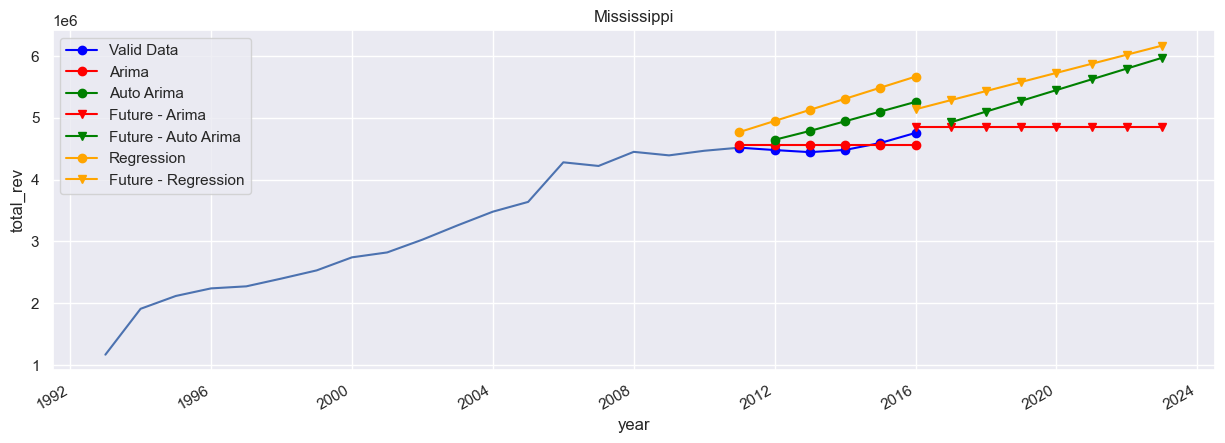

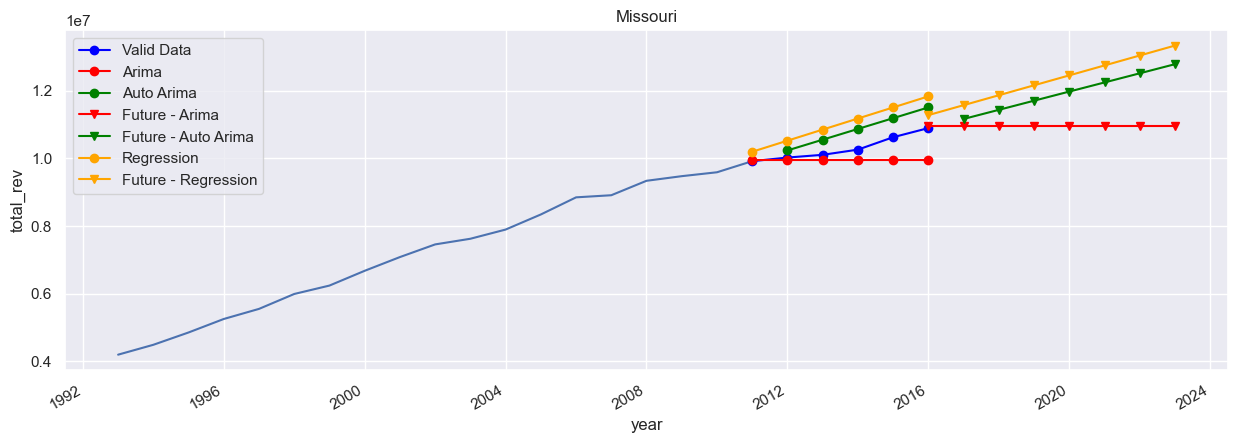

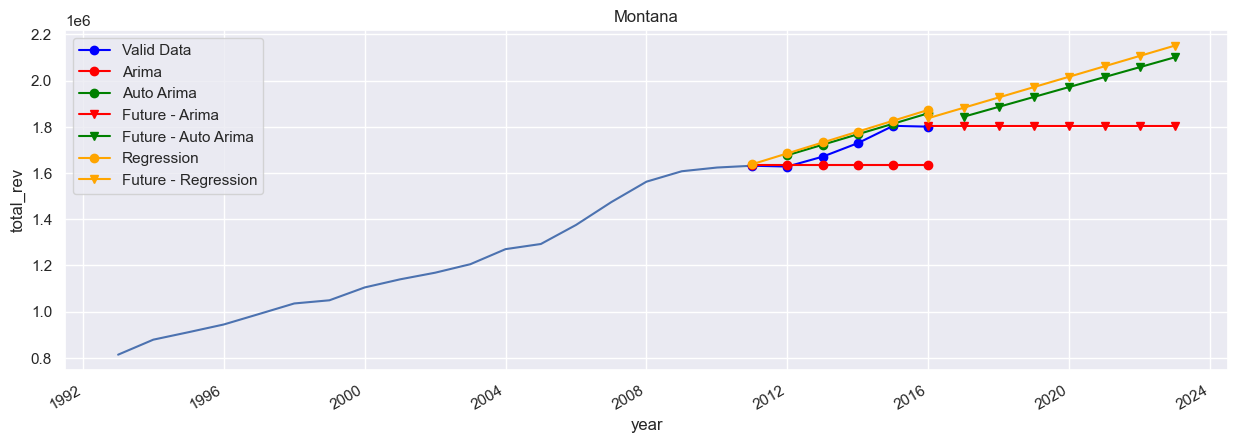

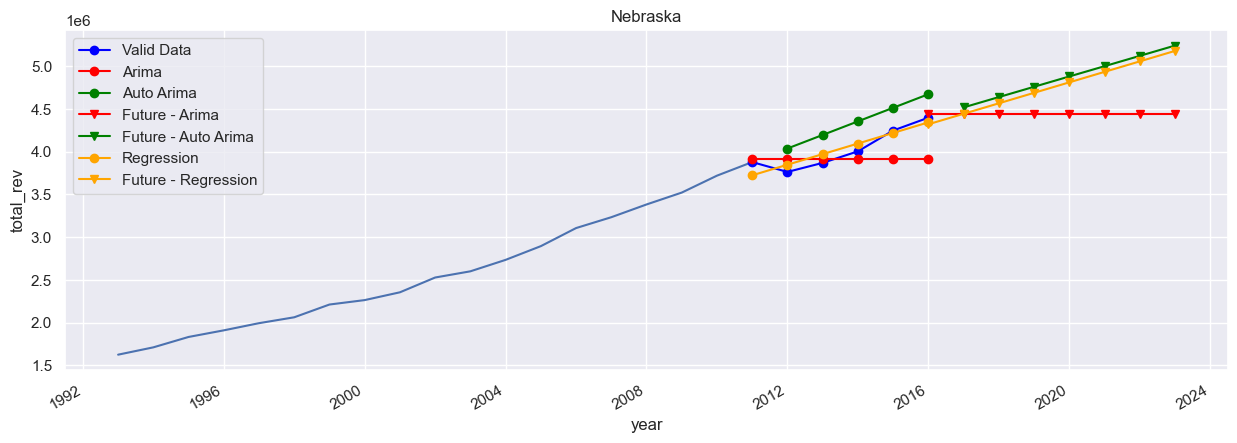

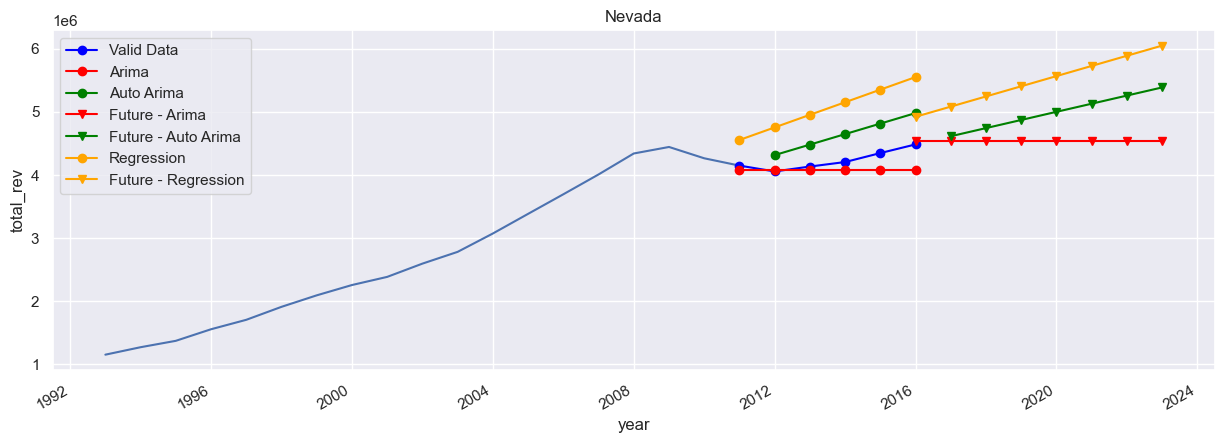

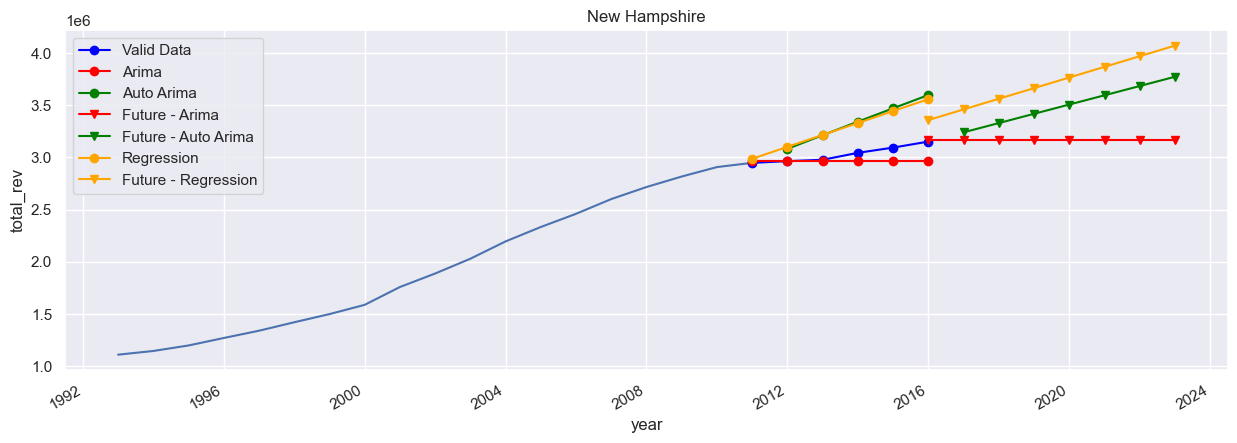

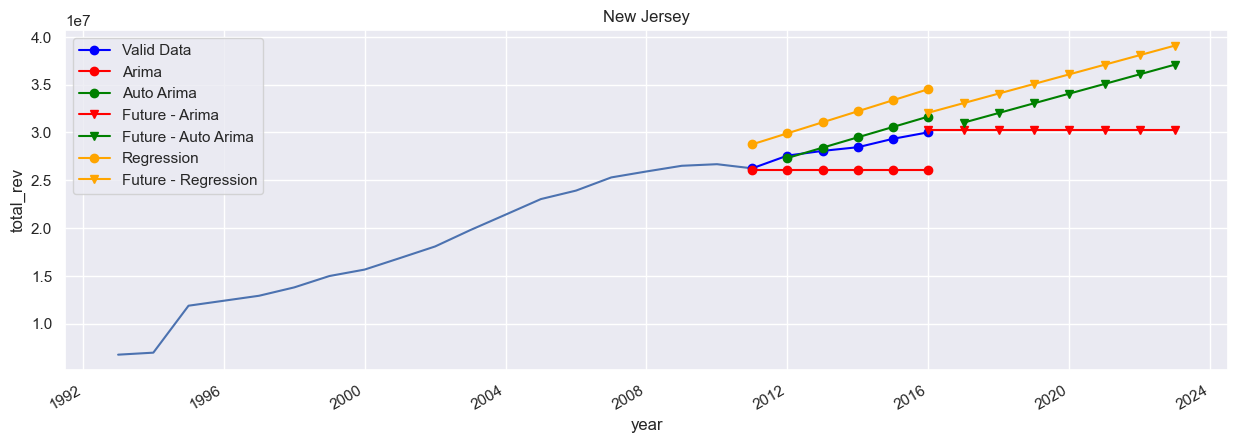

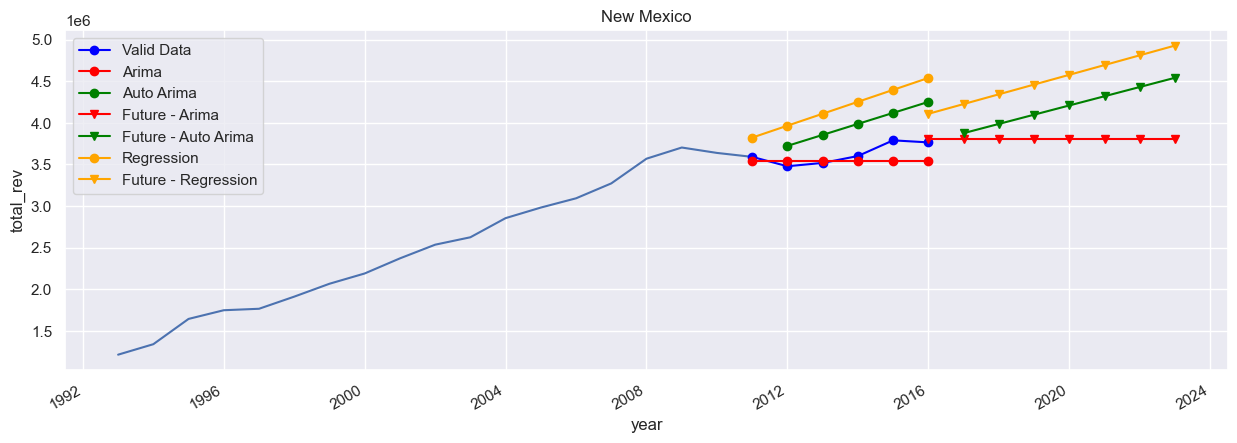

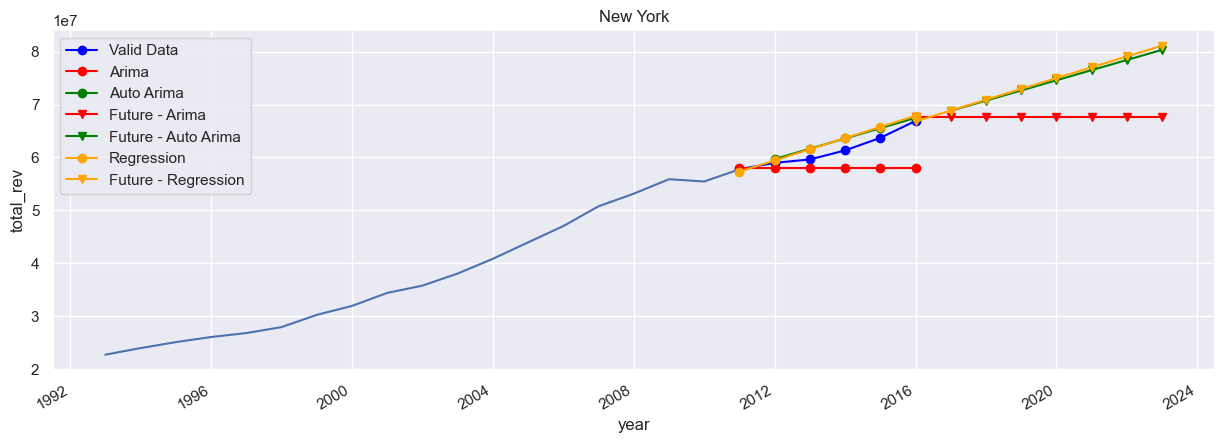

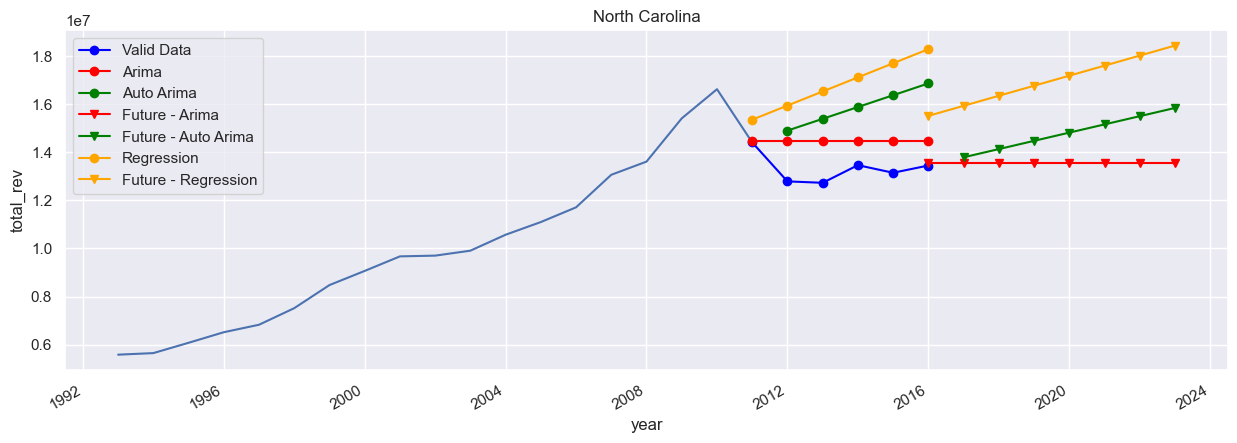

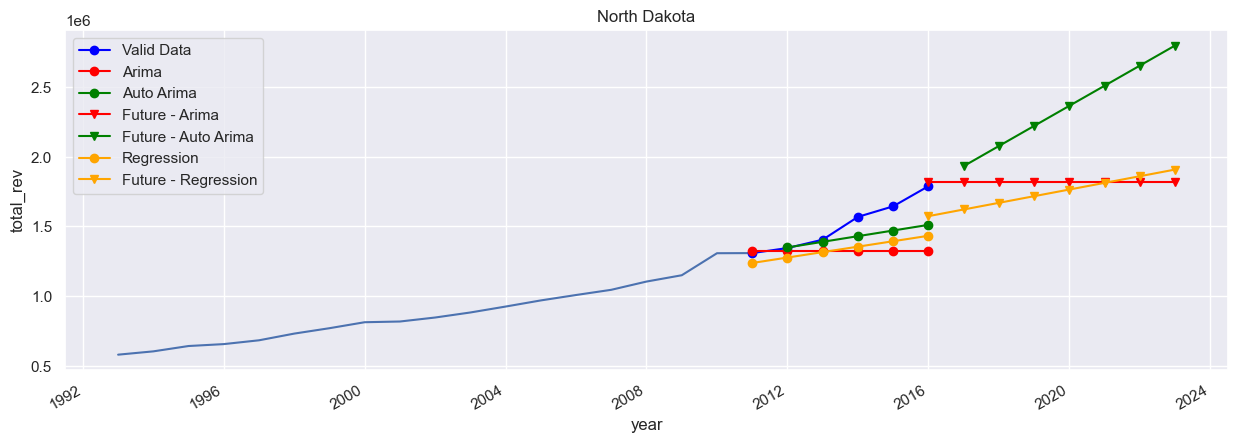

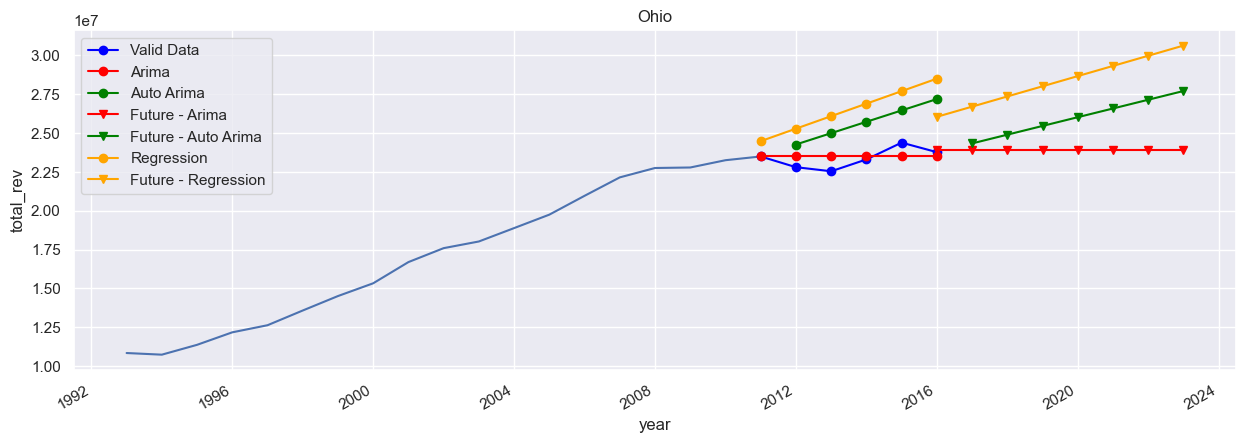

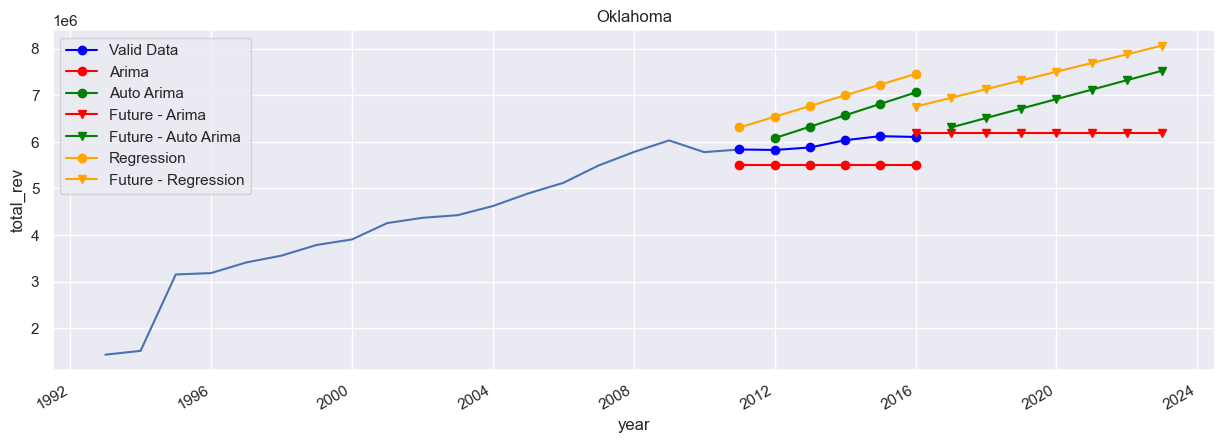

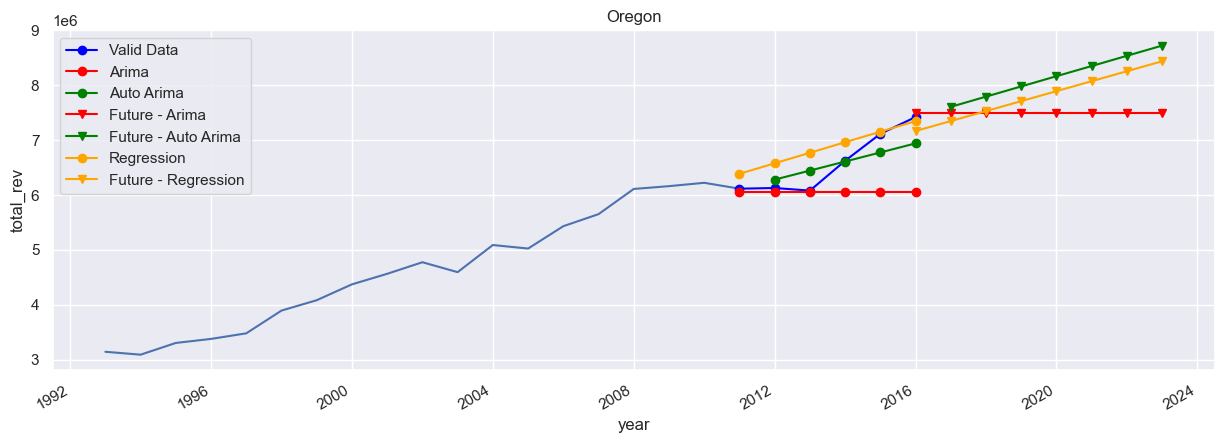

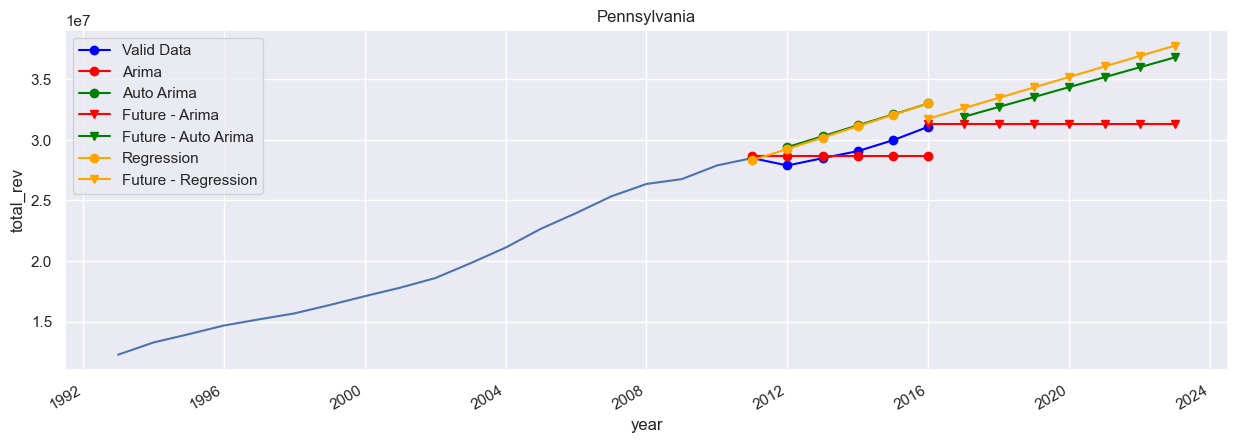

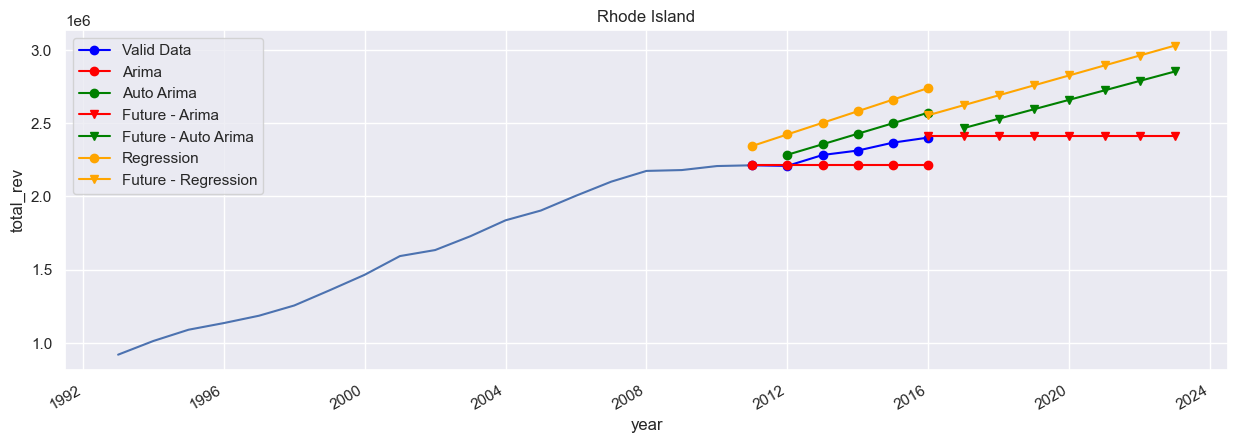

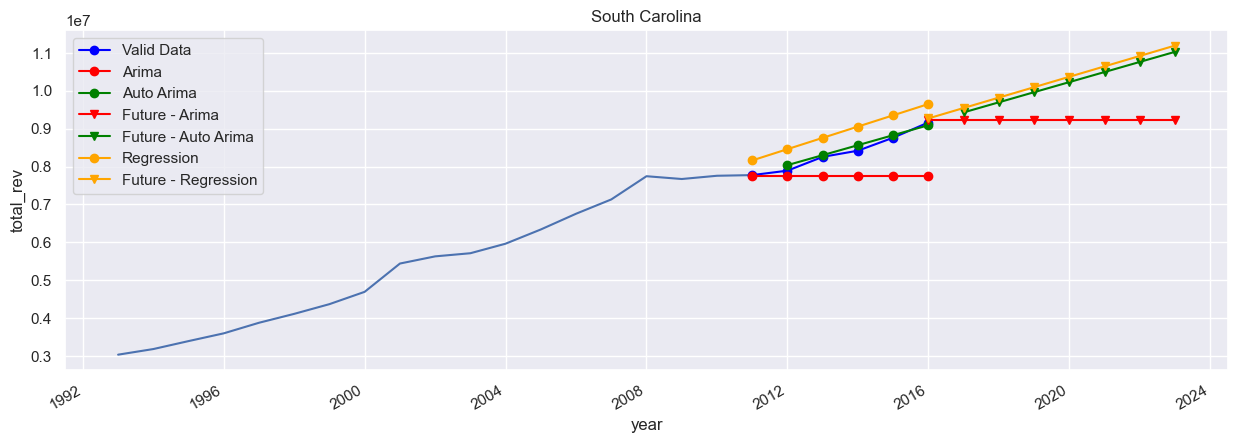

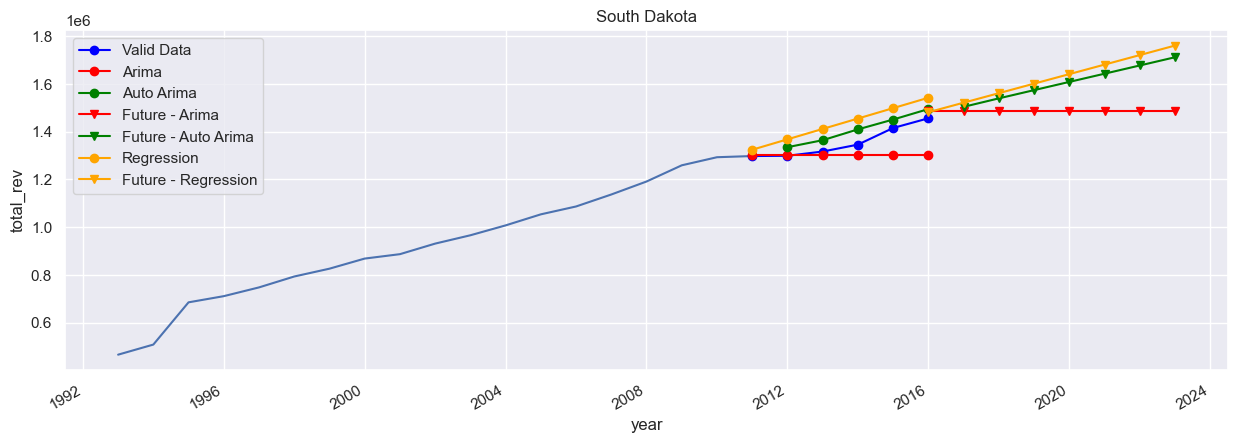

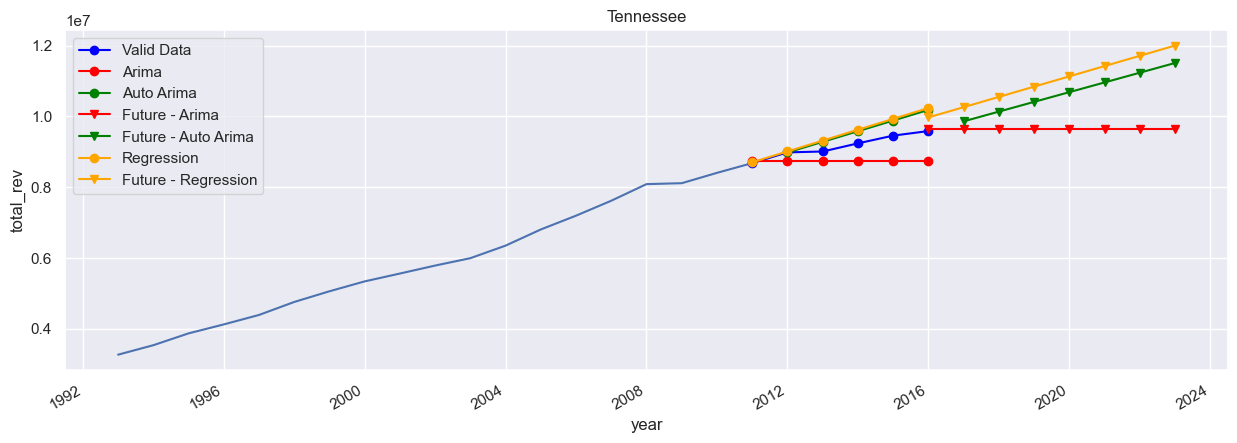

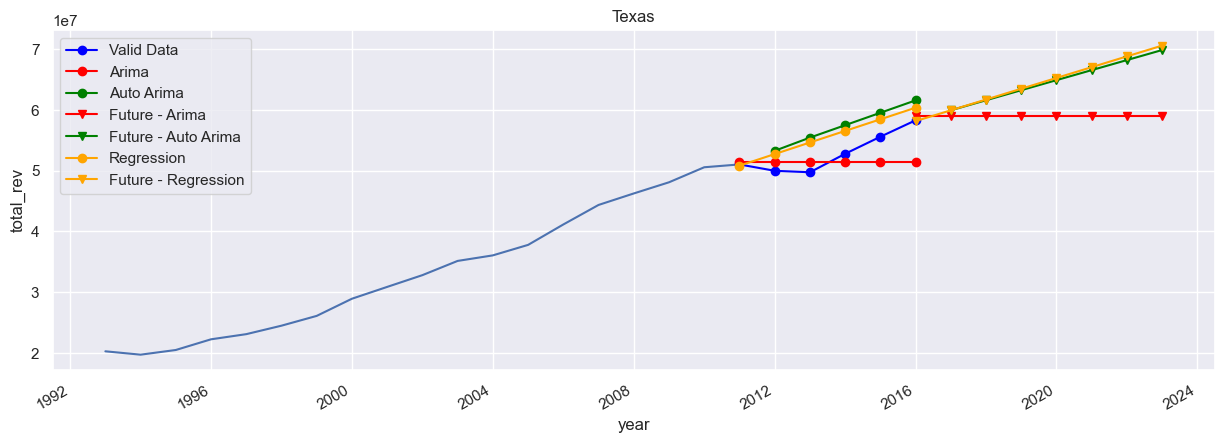

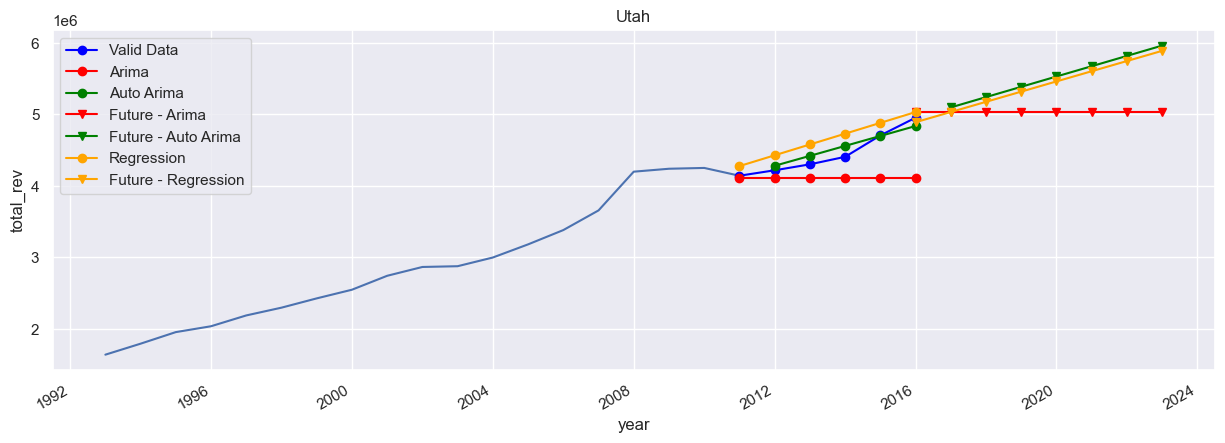

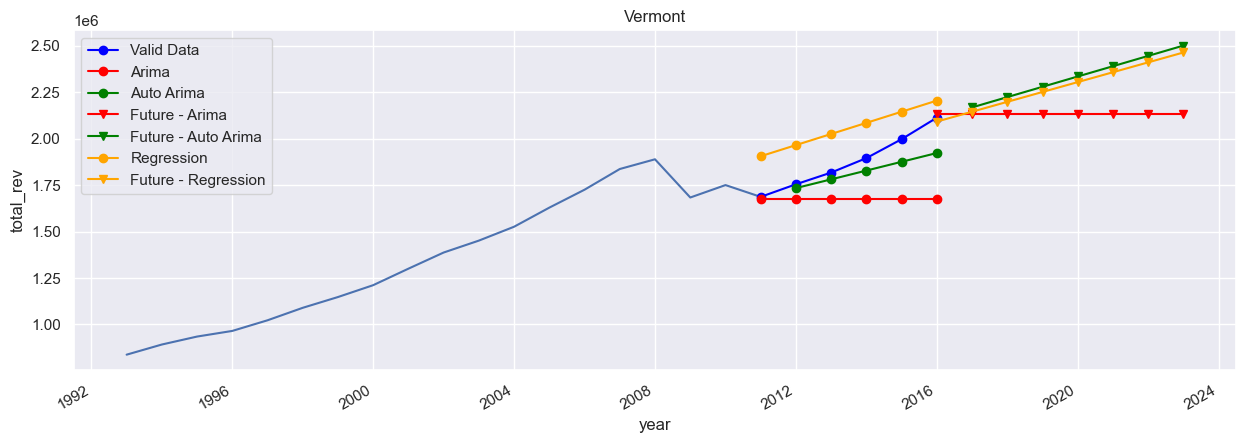

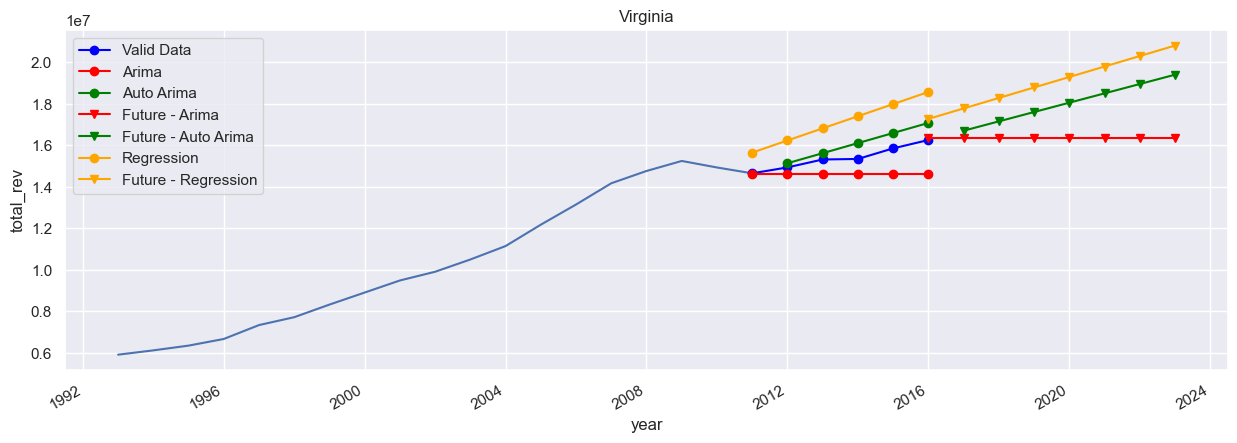

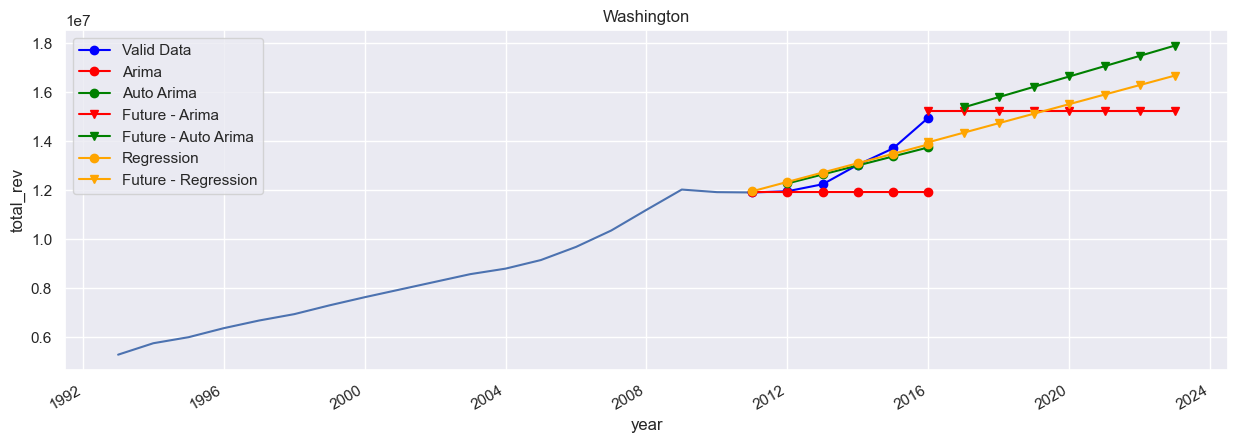

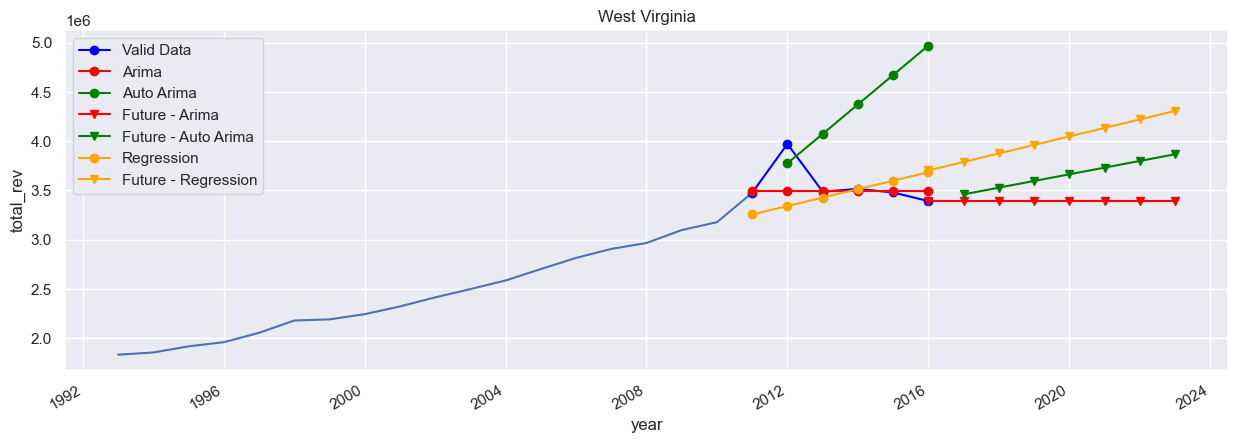

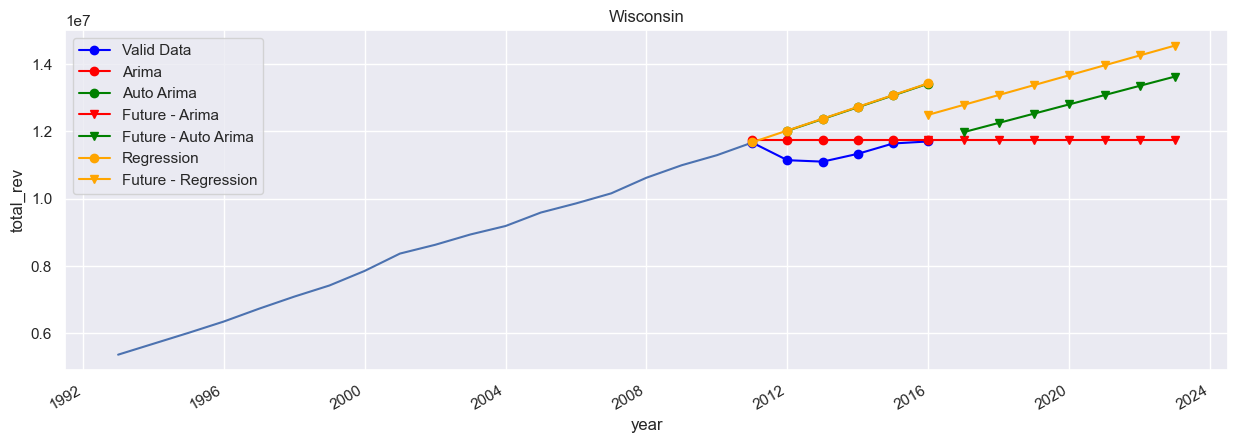

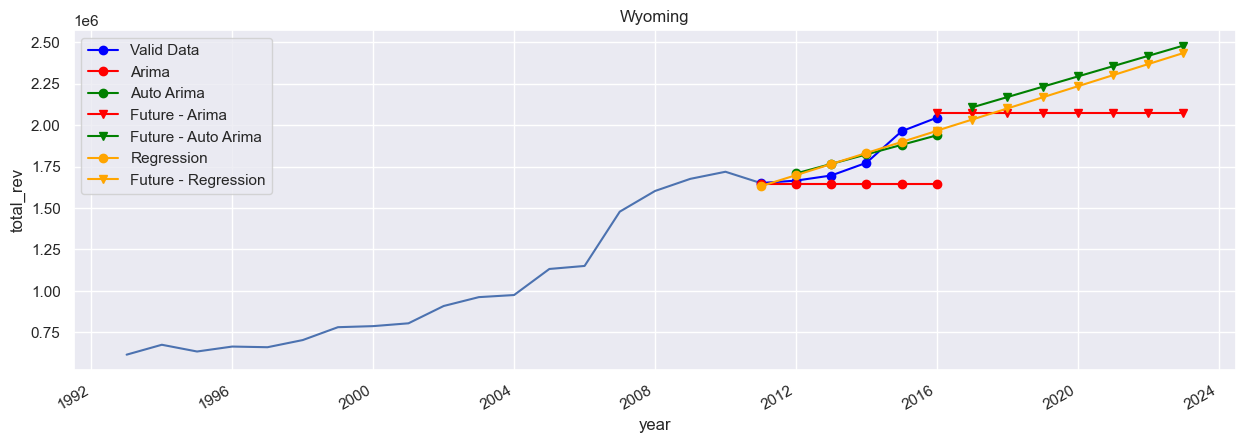

In [29]:
# creating a state list
state = st_time['state'].unique()

for c in state:
    # filtering the train data
    train_data = st_train[st_train['state'] == c] # 3 columns
    train_data2 = train_data[['year', 'total_rev']] # 2 columns
    
    # filtering the valid data
    valid_data = st_valid[st_valid['state'] == c]
    valid_data2 = valid_data[['year', 'total_rev']]
    
    # all data
    all_data = st_time[st_time['state']==c]
    all_data2 = all_data[['year', 'total_rev']]
    
    #convert date column to datetime
    train_data2.set_index('year', inplace=True)
    valid_data2.set_index('year', inplace=True)
    valid_data2.columns = ['Valid Data']    
    all_data2.set_index('year', inplace=True)
    

    # Setting the Valid - Index for 6 years
    index_6_years = pd.date_range(train_data2.index[-1], freq='AS', periods = 6) 
    
    # Setting the Future - Index for 6 years
    future_index_8_years = pd.date_range(valid_data2.index[-1], freq='AS', periods = 8) 
    
    # Dropping all tables
    try:
        del t_fcast1
        del t_fcast2
        del t_fcast3
        
        del f_fcast1
        del f_fcast2
        del f_fcast3       
        
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
        del df_fcast3
    except:
        print("")
        
    ##############################################################################################################
    ######################################            ARIMA             ##########################################  
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE 
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(0,1,3))
            model_arima_fit = model_arima.fit()

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(6)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_6_years)
            t_fcast1 = t_fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(train_data2, order=(3,4,1))
            model_arima_fit = model_arima.fit()

            # Saving ARIMA predictions
            t_fcast1 = model_arima_fit.forecast(6)[0]
            # Passing the same index as the others
            t_fcast1 = pd.Series(t_fcast1, index=index_6_years)
            t_fcast1 = t_fcast1.rename("Arima") 
    except:
        print(c, "Arima Train Error")
        
     # THIS IS FOR THE FUTURE PHASE
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(0,1,3))
            model_arima_fit = model_arima.fit()

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(8)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_8_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(all_data2, order=(3,4,1))
            model_arima_fit = model_arima.fit()

            # Saving ARIMA predictions
            f_fcast1 = model_arima_fit.forecast(8)[0]
            # Passing the same index as the others
            f_fcast1 = pd.Series(f_fcast1, index=future_index_8_years)
            f_fcast1 = f_fcast1.rename("Future - Arima") 
    except:
        print(c, "Arima Future Error")   
        
    ##############################################################################################################
    ######################################      AUTO - ARIMA             ######################################### 
    ##############################################################################################################
    
    # THIS IS FOR THE VALIDATION PHASE
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(train_data2, seasonal=False, m=6)

        # make your forecasts
        t_fcast2 = auto_arima_model.predict(6) 
        t_fcast2 = pd.Series(t_fcast2, index=index_6_years)
        t_fcast2 = t_fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Train Error") 
        
     # THIS IS FOR THE FUTURE PHASE
    try:
        # Running auto ARIMA Future
        auto_arima_model = pm.auto_arima(all_data2, seasonal=False, m=6)

        # make your forecasts
        f_fcast2 = auto_arima_model.predict(8) 
        f_fcast2 = pd.Series(f_fcast2, index=future_index_8_years)
        f_fcast2 = f_fcast2.rename("Future - Auto Arima")

    except:
        print(c, "Auto Arima Future Error")  
     
   

    ##############################################################################################################
    #########################################      Regression       ############################################## 
    ##############################################################################################################
    
    # prepare expected column names
    train_data3 = train_data.copy()
    train_data3 = train_data3[['year', 'total_rev']]
    train_data3.columns = ['ds', 'y']
    train_data3['ds']= to_datetime(train_data3['ds'])
    
    all_data3 = all_data.copy()
    all_data3 = all_data3[['year', 'total_rev']]
    all_data3.columns = ['ds', 'y']
    all_data3['ds']= to_datetime(all_data3['ds'])

    # define the period for which we want a prediction - Valid
    v_df_index_6_years = pd.DataFrame(index_6_years)
    v_df_index_6_years.columns = ['ds']
    v_df_index_6_years['ds']= to_datetime(v_df_index_6_years['ds'])

    # define the period for which we want a prediction - Future
    f_df_index_8_years = pd.DataFrame(future_index_8_years)
    f_df_index_8_years.columns = ['ds']
    f_df_index_8_years['ds']= to_datetime(f_df_index_8_years['ds'])
     
    
    # Creating Ordinal Dates
    train_data['MonthNumberOrdinal'] = train_data['year']
    train_data['MonthNumberOrdinal'] = pd.to_datetime(train_data['MonthNumberOrdinal']).map(datetime.toordinal)

    all_data['MonthNumberOrdinal'] = all_data['year']
    all_data['MonthNumberOrdinal'] = pd.to_datetime(all_data['MonthNumberOrdinal']).map(datetime.toordinal)

    # adding the ordinal dates to the prediction dates
    v_df_index_6_years['ForecastDate_Ordinal'] = pd.to_datetime(v_df_index_6_years['ds']).map(datetime.toordinal)
    f_df_index_8_years['ForecastDate_Ordinal'] = pd.to_datetime(f_df_index_8_years['ds']).map(datetime.toordinal)


    # Fitting LR on Valid
    reg = linear_model.LinearRegression()
    reg.fit(train_data['MonthNumberOrdinal'].values.reshape(-1, 1), train_data['total_rev'].values)

    # Making predictions
    t_fcast3 = reg.predict(v_df_index_6_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    t_fcast3 = pd.Series(t_fcast3, index=index_6_years)
    t_fcast3 = t_fcast3.rename("Regression")

    # Fitting LR on Future
    reg2 = linear_model.LinearRegression()
    reg2.fit(all_data['MonthNumberOrdinal'].values.reshape(-1, 1), all_data['total_rev'].values)

    # Making predictions
    f_fcast3 = reg2.predict(f_df_index_8_years['ForecastDate_Ordinal'].values.reshape(-1, 1))

    # Passing the same index as the others
    f_fcast3 = pd.Series(f_fcast3, index=future_index_8_years)
    f_fcast3 = f_fcast3.rename("Future - Regression")
    
    ##############################################################################################################
    ########################################      SAVING THE MSE        ##########################################
    ##############################################################################################################
    
    try:
        t_fcast1_mse = mean_squared_error(valid_data['total_rev'].values, t_fcast1.values, squared=False)
    except:
        t_fcast1_mse = 0
    try:
        t_fcast2_mse = mean_squared_error(valid_data['total_rev'].values, t_fcast2.values, squared=False)
    except:
        t_fcast2_mse = 0
    try:
        t_fcast3_mse = mean_squared_error(valid_data['total_rev'].values, t_fcast3.values, squared=False)
    except:
        t_fcast3_mse = 0
    

    
    ##############################################################################################################
    ########################################      PLOTTING              ##########################################
    ##############################################################################################################
    
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='year', y='total_rev', data = train_data)
    chart.set_title(c)
    valid_data2.plot(ax=ax, color='blue', marker="o", legend=True)
    # ploting validation
    try:
        t_fcast1.plot(ax=ax, color='red', marker="o", legend=True)
    except:
        print("")        
    try:
        t_fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # plotting future
    try:
        f_fcast1.plot(ax=ax, color='red', marker="v", legend=True)
    except:
        print("")        
    try:
        f_fcast2.plot(ax=ax, color='green', marker="v", legend=True)
    except:
        print("") 
    
    t_fcast3.plot(ax=ax, color='orange', marker="o", legend=True)
    f_fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
    

    
    ##############################################################################################################
    ########################################      SAVING THE RESULTS     #########################################
    ##############################################################################################################
    
    try:
        # Creating a DF for fcast1
        t_fcast1 = t_fcast1.reset_index()
        t_fcast1.columns = ['Date','Arima ForecastValue Validation']

        f_fcast1 = f_fcast1.reset_index()
        f_fcast1.columns = ['Date','Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast1['Arima ForecastValue Future'] = np.nan
        f_fcast1['Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast1 = t_fcast1[['Date','Arima ForecastValue Future','Arima ForecastValue Validation']]

        # Joining them together
        df_fcast1 = pd.concat([t_fcast1, f_fcast1], axis=0)
        df_fcast1['State'] = c
        df_fcast1['ML Method'] = 'Arima'
        df_fcast1['Arima MSE'] = t_fcast1_mse
    
    except:
        df_fcast1 = pd.DataFrame({'Date': [np.nan], 'Arima ForecastValue Future': [np.nan],'Arima ForecastValue Validation': [np.nan], 'State':[c], 'ML Method':['Arima'], 'Arima MSE':[np.nan]})

    try:
        # Creating a DF for fcast2
        t_fcast2 = t_fcast2.reset_index()
        t_fcast2.columns = ['Date','Auto-Arima ForecastValue Validation']

        f_fcast2 = f_fcast2.reset_index()
        f_fcast2.columns = ['Date','Auto-Arima ForecastValue Future']

        # Creating the extra columns
        t_fcast2['Auto-Arima ForecastValue Future'] = np.nan
        f_fcast2['Auto-Arima ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast2 = t_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation']]

        # Joining them together
        df_fcast2 = pd.concat([t_fcast2, f_fcast2], axis=0)
        df_fcast2['State'] = c
        df_fcast2['ML Method'] = 'Auto-Arima'
        df_fcast2['Auto-Arima MSE'] = t_fcast2_mse
    
    except:
        df_fcast2 = pd.DataFrame({'Date': [np.nan], 'Auto-Arima ForecastValue Future': [np.nan],'Auto-Arima ForecastValue Validation': [np.nan], 'State':[c], 'ML Method':['Auto-Arima']})
        
   
    try:
        # Creating a DF for fcast3
        t_fcast3 = t_fcast3.reset_index()
        t_fcast3.columns = ['Date','Regression ForecastValue Validation']

        f_fcast3 = f_fcast3.reset_index()
        f_fcast3.columns = ['Date','Regression ForecastValue Future']

        # Creating the extra columns
        t_fcast3['Regression ForecastValue Future'] = np.nan
        f_fcast3['Regression ForecastValue Validation'] = np.nan

        # reordering 1 only
        t_fcast3 = t_fcast3[['Date','Regression ForecastValue Future','Regression ForecastValue Validation']]

        # Joining them together
        df_fcast3 = pd.concat([t_fcast3, f_fcast3], axis=0)
        df_fcast3['State'] = c
        df_fcast3['ML Method'] = 'Regression'
        df_fcast3['Regression MSE'] = t_fcast3_mse
        df_fcast3['Regression Slope'] = reg2.coef_[0]
        df_fcast3['Regression Trend Direction'] = np.where(df_fcast3['Regression Slope']<=0, 'Negative Trend', 'Positive Trend')
        df_fcast3['Regression Slope Monthly Change Proj'] = df_fcast3['Regression ForecastValue Future'].iloc[-1] - df_fcast3['Regression ForecastValue Future'].iloc[-2]
    
    except:
        df_fcast3 = pd.DataFrame({'Date': [np.nan], 'Regression ForecastValue Future': [np.nan],'Regression ForecastValue Validation': [np.nan], 'State':[c], 'ML Method':['Auto-Arima'], 'Regression Slope':[np.nan], 'Regression Trend Direction':[np.nan], 'Regression Slope Monthly Change Proj':[np.nan]})
        
    # Aggregating the data to avoid duplication
    df_fcast1 = df_fcast1.groupby(['Date', 'State','ML Method'], as_index = False).agg({'Arima ForecastValue Future':'sum','Arima ForecastValue Validation':'sum','Arima MSE':'max'})
    df_fcast2 = df_fcast2.groupby(['Date', 'State','ML Method'], as_index = False).agg({'Auto-Arima ForecastValue Future':'sum','Auto-Arima ForecastValue Validation':'sum','Auto-Arima MSE':'max'})
    df_fcast3 = df_fcast3.groupby(['Date', 'State','ML Method', 'Regression Trend Direction'], as_index = False).agg({'Regression ForecastValue Future':'sum','Regression ForecastValue Validation':'sum','Regression MSE':'max','Regression Slope':'max','Regression Slope Monthly Change Proj':'max'})

    # joining them all together
    all_forecasts = df_fcast1.merge(df_fcast2[['Date','Auto-Arima ForecastValue Future','Auto-Arima ForecastValue Validation', 'Auto-Arima MSE']], how = 'left', on ='Date')
    all_forecasts = all_forecasts.merge(df_fcast3[['Date','Regression ForecastValue Future', 'Regression ForecastValue Validation', 'Regression MSE', 'Regression Slope','Regression Slope Monthly Change Proj','Regression Trend Direction']], how = 'left', on ='Date')

    # Saving the predictions in a DF
    try:
        final_forecasts = pd.concat([final_forecasts, all_forecasts], ignore_index = True)
    except:
        final_forecasts = all_forecasts 


In [30]:
final_forecasts.head(50)

,Date,State,ML Method,Arima ForecastValue Future,Arima ForecastValue Validation,Arima MSE,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE,Regression ForecastValue Future,Regression ForecastValue Validation,Regression MSE,Regression Slope,Regression Slope Monthly Change Proj,Regression Trend Direction
0,2011-01-01,Alabama,Arima,0.000000e+00,7.379659e+06,133628.231212,0.000000e+00,0.000000e+00,0,0.000000e+00,7.730581e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
1,2012-01-01,Alabama,Arima,0.000000e+00,7.379659e+06,133628.231212,0.000000e+00,7.629466e+06,0,0.000000e+00,8.007971e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
2,2013-01-01,Alabama,Arima,0.000000e+00,7.379659e+06,133628.231212,0.000000e+00,7.882207e+06,0,0.000000e+00,8.286120e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
3,2014-01-01,Alabama,Arima,0.000000e+00,7.379659e+06,133628.231212,0.000000e+00,8.134947e+06,0,0.000000e+00,8.563510e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
4,2015-01-01,Alabama,Arima,0.000000e+00,7.379659e+06,133628.231212,0.000000e+00,8.387688e+06,0,0.000000e+00,8.840899e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
5,2016-01-01,Alabama,Arima,7.516102e+06,7.379659e+06,133628.231212,0.000000e+00,8.640429e+06,0,8.243042e+06,9.118289e+06,1.178986e+06,613.745350,224017.052827,Positive Trend
6,2017-01-01,Alabama,Arima,7.516102e+06,0.000000e+00,133628.231212,7.701662e+06,0.000000e+00,0,8.467673e+06,0.000000e+00,1.178986e+06,613.745350,224017.052827,Positive Trend
7,2018-01-01,Alabama,Arima,7.516102e+06,0.000000e+00,133628.231212,7.904756e+06,0.000000e+00,0,8.691690e+06,0.000000e+00,1.178986e+06,613.745350,224017.052827,Positive Trend
8,2019-01-01,Alabama,Arima,7.516102e+06,0.000000e+00,133628.231212,8.107851e+06,0.000000e+00,0,8.915707e+06,0.000000e+00,1.178986e+06,613.745350,224017.052827,Positive Trend
9,2020-01-01,Alabama,Arima,7.516102e+06,0.000000e+00,133628.231212,8.310945e+06,0.000000e+00,0,9.139724e+06,0.000000e+00,1.178986e+06,613.745350,224017.052827,Positive Trend


In [31]:

# Union-ing predictions with the original dataset 

#creating the needed columns
st_time['Arima ForecastValue Future'] = np.nan
st_time['Arima ForecastValue Validation'] = np.nan
st_time['Arima MSE'] = np.nan
st_time['Auto-Arima ForecastValue Future'] = np.nan
st_time['Auto-Arima ForecastValue Validation'] = np.nan
st_time['Auto-Arima MSE'] = np.nan
st_time['Regression ForecastValue Future'] = np.nan
st_time['Regression ForecastValue Validation'] = np.nan
st_time['Regression MSE'] = np.nan
st_time['Regression Slope'] = np.nan
st_time['Regression Slope Monthly Change Proj'] = np.nan
st_time['Regression Trend Direction'] = np.nan

st_time = st_time.rename({'year': 'Date', 'state':'State', 'total_rev':'Revenue'}, axis=1)

del final_forecasts['ML Method']

final_forecasts['Revenue'] = np.nan

In [33]:
# Reordering final_forecasts

final_forecasts = final_forecasts[['State', 'Date', 'Revenue', 'Arima ForecastValue Future',
       'Arima ForecastValue Validation', 'Arima MSE',
       'Auto-Arima ForecastValue Future',
       'Auto-Arima ForecastValue Validation', 'Auto-Arima MSE',
       'Regression ForecastValue Future',
       'Regression ForecastValue Validation', 'Regression MSE',
       'Regression Slope', 'Regression Slope Monthly Change Proj',
       'Regression Trend Direction']]

# Union
output_df = pd.concat([st_time, final_forecasts], axis=0)

In [35]:
output_df.tail(50)

,State,Date,Revenue,Arima ForecastValue Future,Arima ForecastValue Validation,Arima MSE,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE,Regression ForecastValue Future,Regression ForecastValue Validation,Regression MSE,Regression Slope,Regression Slope Monthly Change Proj,Regression Trend Direction
613,Washington,2013-01-01,NaN,0.000000e+00,1.193050e+07,1.511003e+06,0.000000e+00,1.264316e+07,0.0,0.000000e+00,1.272171e+07,5.209175e+05,1066.667702,389333.711249,Positive Trend
614,Washington,2014-01-01,NaN,0.000000e+00,1.193050e+07,1.511003e+06,0.000000e+00,1.301177e+07,0.0,0.000000e+00,1.310465e+07,5.209175e+05,1066.667702,389333.711249,Positive Trend
615,Washington,2015-01-01,NaN,0.000000e+00,1.193050e+07,1.511003e+06,0.000000e+00,1.338038e+07,0.0,0.000000e+00,1.348760e+07,5.209175e+05,1066.667702,389333.711249,Positive Trend
616,Washington,2016-01-01,NaN,1.525123e+07,1.193050e+07,1.511003e+06,0.000000e+00,1.374899e+07,0.0,1.396030e+07,1.387054e+07,5.209175e+05,1066.667702,389333.711249,Positive Trend
617,Washington,2017-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.538582e+07,0.000000e+00,0.0,1.435070e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend
618,Washington,2018-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.580727e+07,0.000000e+00,0.0,1.474004e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend
619,Washington,2019-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.622872e+07,0.000000e+00,0.0,1.512937e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend
620,Washington,2020-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.665017e+07,0.000000e+00,0.0,1.551870e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend
621,Washington,2021-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.707163e+07,0.000000e+00,0.0,1.590910e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend
622,Washington,2022-01-01,NaN,1.525123e+07,0.000000e+00,1.511003e+06,1.749308e+07,0.000000e+00,0.0,1.629844e+07,0.000000e+00,5.209175e+05,1066.667702,389333.711249,Positive Trend


In [36]:
# Setting zeros to np.nan

output_df['Arima ForecastValue Future'][output_df['Arima ForecastValue Future'] < 1] = np.nan
output_df['Arima ForecastValue Validation'][output_df['Arima ForecastValue Validation'] < 1] = np.nan
output_df['Arima MSE'][output_df['Arima MSE'] < 1] = np.nan
output_df['Auto-Arima ForecastValue Future'][output_df['Auto-Arima ForecastValue Future'] < 1] = np.nan
output_df['Auto-Arima ForecastValue Validation'][output_df['Auto-Arima ForecastValue Validation'] < 1] = np.nan
output_df['Auto-Arima MSE'][output_df['Auto-Arima MSE'] < 1] = np.nan
output_df['Regression ForecastValue Future'][output_df['Regression ForecastValue Future'] < 1] = np.nan
output_df['Regression ForecastValue Validation'][output_df['Regression ForecastValue Validation'] < 1] = np.nan
output_df['Regression MSE'][output_df['Regression MSE'] < 1] = np.nan
output_df['Regression Slope'][output_df['Regression Slope'] < 1] = np.nan
output_df['Regression Slope Monthly Change Proj'][output_df['Regression Slope Monthly Change Proj'] < 1] = np.nan


In [37]:
output_df.describe()

,Revenue,Arima ForecastValue Future,Arima ForecastValue Validation,Arima MSE,Auto-Arima ForecastValue Future,Auto-Arima ForecastValue Validation,Auto-Arima MSE,Regression ForecastValue Future,Regression ForecastValue Validation,Regression MSE,Regression Slope,Regression Slope Monthly Change Proj
count,1.224000e+03,4.080000e+02,3.060000e+02,6.630000e+02,3.570000e+02,2.550000e+02,0.0,4.080000e+02,3.060000e+02,6.630000e+02,663.000000,6.630000e+02
mean,9.290765e+06,1.351422e+07,1.191323e+07,8.508858e+05,1.486960e+07,1.317410e+07,NaN,1.511277e+07,1.354710e+07,1.305372e+06,1062.651888,3.878679e+05
std,1.191733e+07,1.715763e+07,1.414768e+07,1.461423e+06,1.893516e+07,1.578849e+07,NaN,1.849950e+07,1.646593e+07,1.997721e+06,1358.420249,4.958234e+05
min,4.656500e+05,1.334685e+06,1.221878e+06,8.038262e+04,1.329719e+06,1.283071e+06,NaN,1.396222e+06,1.237700e+06,4.207424e+04,86.300212,3.149958e+04
25%,2.224650e+06,3.166898e+06,2.963365e+06,1.945019e+05,3.594110e+06,3.532989e+06,NaN,3.782285e+06,3.359724e+06,2.726935e+05,239.012561,8.723958e+04
50%,5.256748e+06,7.956732e+06,7.379659e+06,4.299427e+05,8.719701e+06,8.134947e+06,NaN,9.232595e+06,8.223245e+06,5.813263e+05,631.193262,2.303855e+05
75%,1.110987e+07,1.525123e+07,1.445081e+07,7.842956e+05,1.665017e+07,1.536441e+07,NaN,1.729042e+07,1.586886e+07,1.565586e+06,1143.205000,4.172698e+05
max,8.921726e+07,9.072187e+07,6.888342e+07,9.289366e+06,1.078354e+08,8.261159e+07,NaN,1.030141e+08,9.385027e+07,1.231630e+07,6805.397710,2.483970e+06


## 5. Export the dataframe 

In [38]:
# Exporting the data in a CSV
output_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Time Series Forecast.csv'))

In [39]:
df_st.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'state_final.csv'))

In [40]:
df_dist.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'district_final.csv'))